# Project Structure  

## Step 0: Load Datasets
## Non Canonical
- ### Load Broadcast Ali
- ### Load Broadcast AWS
- ### Load Uncles
- ### Load Forked

## Canonical
- ### Load Canonical

## Step 1: Basic Analysis
- ### Analyse basic status of the broadcast dataset
- ### Collect all zero gasUsed blocks from broadcast

## Step 2: Clean and Prepare Data
- ### Delete broadcast blocks who are out of the canonical time range
- ### Get broadcast between canonical starting and ending time period
- ### Analyze blocks' uncle numbers and we think we need a further discussion on that if this factor should be saved.
- ### Keep four dfs in same columns
- ### Label canonical as 0 and others as 1
- ### Combine dataframes as one dataset

## Step 3: Apply Models
- ### Random Forest
- ### Logistic Regression
- ### K fold Cross Validation
- ### Logistic Regression with Cross Validation

## Step 4: Analyze Features
- ### size
- ### miner
- ### Analyze relationship between factors and the corresponding value

In [32]:
import pandas as pd
import json
import configparser
import numpy as np
import os

In [2]:
config_path = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/env.conf'
# config_path = '/Users/charlesge/go/src/github.com/ethereum/go-ethereum/analysis_tool_python/env.conf'
config = configparser.ConfigParser()
config.read(config_path)

# we use json paths in this project
UNCLE_PATH = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/uncle/'
CANONICAL_PATH = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/'
FORKED_PATH = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/'
BROADCAST_ALI_PATH = config.get('broadcast_ali', 'json_path')
BROADCAST_AWS_PATH = config.get('broadcast_aws', 'json_path')

BROADCAST_PATH = '/Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/broadcast/'

## Step  0: Load Datasets

### Load Broadcast

In [66]:
broadcast_df = None

for filename in sorted(os.listdir(BROADCAST_PATH)):
    if filename.endswith(".txt"):
        print('loading ', filename)
        new_broadcast = pd.read_json(BROADCAST_PATH + filename, lines=True, dtype=False)
        broadcast_df = pd.concat([broadcast_df, new_broadcast], ignore_index=True)

print(broadcast_df.shape)
broadcast_df.head()

loading  0.txt
loading  40000.txt
loading  6090000.txt
loading  6120000.txt
loading  6130000.txt
loading  6170000.txt
loading  6200000.txt
loading  6210000.txt
loading  6220000.txt
loading  6230000.txt
loading  6240000.txt
loading  6260000.txt
loading  6270000.txt
loading  6280000.txt
loading  6310000.txt
loading  8110000.txt
loading  8120000.txt
loading  8130000.txt
loading  8140000.txt
loading  8150000.txt
loading  8160000.txt
loading  8170000.txt
loading  8180000.txt
loading  8190000.txt
loading  8200000.txt
loading  8210000.txt
loading  8240000.txt
loading  8250000.txt
loading  8260000.txt
loading  8270000.txt
loading  8280000.txt
loading  8290000.txt
loading  8310000.txt
loading  8320000.txt
loading  8330000.txt
loading  8340000.txt
loading  8350000.txt
loading  8360000.txt
loading  8370000.txt
loading  8380000.txt
loading  8390000.txt
loading  8400000.txt
loading  8410000.txt
loading  8420000.txt
loading  8430000.txt
loading  8440000.txt
loading  8450000.txt
loading  8460000.txt


difficulty gasLimit gasUsed  \
0    16971378211     5075       0   
1    17171480576     5003       0   
2    17163096064     5000       0   
3    17154715646     5009       0   
4  1378675664031   0x13c1     0x0   

                                                hash  \
0  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...   
1  0x700aadd703c81b067d39422f793f2d694afbfd72156a...   
2  0xb495a1d7e6663152ae92708da4843337b958146015a2...   
3  0x43be5526c636c00c391fd0a3ac635e0f2568a10102c5...   
4  0x6657c87909f45c0b7654cf02982b14a355075bc9f25d...   

                                        miner number    size  timestamp txNum  \
0  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45     25  0x10c8        0.0     0   
1  0x0A0393d4f9988126EEEc6d2B47c816e633a20C22      1  0x10d8        0.0     0   
2  0xdd2F1e6e498202e86D8f5442Af596580A4f03c2C      2  0x1100        0.0     0   
3  0x41F872e72813b24C2986aed888e76638264de0b9      3  0x10c8        0.0     0   
4  0x5928E011c3B8fc8bEf32d5B86A19F2A54c5BE654  41915  0x10c8        0.0     0   

  uncleNum  
0        0  
1        0  
2        0  
3        0  
4        0

### Load Uncles

In [4]:
uncle_df = None

for filename in sorted(os.listdir(UNCLE_PATH)):
    if filename.endswith(".txt"):
        print('loading ', filename)
        new_uncles = pd.read_json(UNCLE_PATH + filename, lines=True)
        uncle_df = pd.concat([uncle_df, new_uncles], ignore_index=True)

print(uncle_df.shape)
uncle_df.head()

loading  7200000.txt
loading  7210000.txt
loading  7220000.txt
loading  7230000.txt
loading  7240000.txt
loading  7250000.txt
loading  7260000.txt
loading  7270000.txt
loading  7280000.txt
loading  7290000.txt
loading  7300000.txt
loading  7310000.txt
loading  7320000.txt
loading  7330000.txt
loading  7340000.txt
loading  7350000.txt
loading  7360000.txt
loading  7370000.txt
loading  7380000.txt
loading  7390000.txt
loading  7400000.txt
loading  7410000.txt
loading  7420000.txt
loading  7430000.txt
loading  7440000.txt
loading  7450000.txt
loading  7460000.txt
loading  7470000.txt
loading  7480000.txt
loading  7490000.txt
loading  7500000.txt
loading  7510000.txt
loading  7520000.txt
loading  7530000.txt
loading  7540000.txt
loading  7550000.txt
loading  7560000.txt
loading  7570000.txt
loading  7580000.txt
loading  7590000.txt
loading  7600000.txt
loading  7610000.txt
loading  7620000.txt
loading  7630000.txt
loading  7640000.txt
loading  7650000.txt
loading  7660000.txt
loading  7670

difficulty  gasLimit  gasUsed  \
0  0x8886feaa77f19   7992222  5902995   
1  0x88cd0ecd9f73e   8000029  7994199   
2  0x895a97bdabd2c   8000029  5743895   
3  0x8a7418c515067   8000025  7980364   
4  0x8ae6afe6cb82d   8007811  8003275   

                                                hash  \
0  0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a6...   
1  0x4e440909390986585b35a53b31d285c95899710b9ba6...   
2  0x1e48f03f15d604bcecade135e218821d8d3c243f7a6a...   
3  0x8d9a618adde95515b851c248d8a94b73e766af5ea184...   
4  0xea126eb6612905daeb5241d7222ce28b236f4dfb25c6...   

                                        miner   number  size  timestamp  \
0  0xcc16e3c00dbbe76603fa833ec20a48f786dfe610  7200009   521        0.0   
1  0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c  7200023   541        0.0   
2  0xea674fdde714fd979de3edf0f56aa9716b898ec8  7200034   538        0.0   
3  0x829bd824b016326a401d083b33d092293333a830  7200072   540        0.0   
4  0x829bd824b016326a401d083b33d092293333a830  7200090   536        0.0   

   txNum  uncleNum  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0

### Load Forked

In [5]:
forked_df = None

for filename in sorted(os.listdir(FORKED_PATH)):
    if filename.endswith(".txt"):
        print('loading ', FORKED_PATH + filename)
        new_forked = pd.read_json(FORKED_PATH + filename, lines=True)
        forked_df = pd.concat([forked_df, new_forked], ignore_index=True)

print(forked_df.shape)
forked_df.head()

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2110000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2120000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2130000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2140000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2150000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2160000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2170000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2180000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2900000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2910000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2920000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2930000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2940000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2950000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2960000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/2970000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3670000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3680000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3690000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3700000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3710000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3720000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3730000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/3740000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4440000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4450000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4460000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4470000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4480000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4490000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4500000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/4510000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5200000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5210000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5220000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5230000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5240000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5250000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5260000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/5270000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6000000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6010000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6020000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6030000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6040000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6050000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6060000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6070000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6770000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6780000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6790000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6800000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6810000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6820000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6830000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/6840000.txt
loading  /Users/Jinyue/Documents/go-ethe

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7690000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7700000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7710000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7720000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7730000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7740000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7750000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/forked/7760000.txt
loading  /Users/Jinyue/Documents/go-ethe

difficulty  gasLimit  gasUsed  \
0  63331537494188   4712388        0   
1  63580290188712   4703192    21000   
2  63240211856690   4712379        0   
3  63706474698380   4712388   105000   
4  63737682040116   4712388   321022   

                                                hash  \
0  0xebeabb2e972e6dfe1f3cc7d6eeea5006cea363a24dd4...   
1  0xc3a168aebfe6a19ca3063527a5eb990a56de91d74b69...   
2  0x81181666515c77a112739d09736e4db495d7b27b0143...   
3  0xd7aecb487cef45ab492f18e78ae41be0e3f9f8d7e617...   
4  0x16edcf526068f01be55c7200fb7dff56145a32a8dd3b...   

                                        miner   number  size  timestamp  \
0  0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb  2115684   541        0.0   
1  0x2a65aca4d5fc5b5c859090a6c34d164135398226  2115626  1179        0.0   
2  0x61c808d82a3ac53231750dadc13c777b59310bd9  2115562   532        0.0   
3  0xea674fdde714fd979de3edf0f56aa9716b898ec8  2115478  2170        0.0   
4  0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01  2115467  2138        0.0   

   txNum  uncleNum  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0

### Load Canonical

In [6]:
canonical_df = None

for filename in sorted(os.listdir(CANONICAL_PATH)):
    if filename.endswith(".txt"):
        print('loading ', CANONICAL_PATH + filename)
        new_canonical = pd.read_json(CANONICAL_PATH + filename, lines=True)
        canonical_df = pd.concat([canonical_df, new_canonical], ignore_index=True)

print(canonical_df.shape)
canonical_df.head()

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6830000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6840000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6850000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6860000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6870000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6880000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6890000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/6900000.txt
loading  /Users/

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7500000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7510000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7520000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7530000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7540000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7550000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7560000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/7570000.txt
loading  /Users/

loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8170000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8180000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8190000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8200000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8210000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8220000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8230000.txt
loading  /Users/Jinyue/Documents/go-ethereum/analysis_tool_python/analysis_for_proposal/feature_json/canonical/8240000.txt
loading  /Users/

difficulty  gasLimit  gasUsed  \
0  0x88622c2bfedab   8000029  7999694   
1  0x88723a734d445   7994877   742283   
2  0x88713a734d445   8000029  1815372   
3  0x88814a9ca0d86   8000000  7985081   
4  0x886f3cb50a372   8000000  7610034   

                                                hash  \
0  0xa74abd1fe708da69f311447bde33193e9b23af3a6eec...   
1  0xd6a9a861552586be4f4ecbaf14754d142bb1887e67f8...   
2  0xc8958f7838145975ab421e3a0c08a4eeab955233fd63...   
3  0x423d96a9aaf78b780bd0bb93a25a45a57260f16b1106...   
4  0xbee381dabfe10ec32d6d28cd34c1c7200d0593f84d0d...   

                                        miner   number   size  timestamp  \
0  0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c  6839999  30787        0.0   
1  0x2a5994b501e6a560e727b6c2de5d856396aadd38  6839998   3598        0.0   
2  0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5  6839997   7253        0.0   
3  0x2a65aca4d5fc5b5c859090a6c34d164135398226  6839996  19764        0.0   
4  0x829bd824b016326a401d083b33d092293333a830  6839995  28231        0.0   

   txNum  uncleNum  
0    183         0  
1     15         0  
2     46         0  
3    127         0  
4    194         0

## Step 1: Basic Analysis

Feature list:  
1. uncleNum 
2. timestamp diff  
3. size 
4. number 
5. miner  
6. gasUsed 
7. gasLimit 
8. difficulty

### Analyse basic status of the broadcast dataset   

#### Broadcast Dataframe columns

In [67]:
broadcast_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum'],
      dtype='object')

## Step 2: Clean and Prepare Data

**Check each column value type and convert to int or str if needed**

**canonical df**

In [12]:
for column in canonical_df.columns:
    print(column, type(canonical_df[column][0]), ', ', canonical_df[column][0], '\n')

difficulty <class 'str'> ,  0x88622c2bfedab 

gasLimit <class 'numpy.int64'> ,  8000029 

gasUsed <class 'numpy.int64'> ,  7999694 

hash <class 'str'> ,  0xa74abd1fe708da69f311447bde33193e9b23af3a6eec05989d3fb07d0f6311cc 

miner <class 'str'> ,  0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c 

number <class 'numpy.int64'> ,  6839999 

size <class 'numpy.int64'> ,  30787 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  183 

uncleNum <class 'numpy.int64'> ,  0 



**feature difficulty is str, so we need to convert it to  int. First, let's check each value type.**

In [15]:
str_counter = 0
hex_str_counter = 0
str_list = []
hex_str_list = []

for diff in canonical_df.difficulty:
    if type(diff) == type('str'):
        str_counter += 1
        if diff.startswith('0x'):
            hex_str_counter += 1
            hex_str_list.append(diff)
        else:
            str_list.append(diff)
        
print(str_counter)
print(hex_str_counter)
print(canonical_df.shape)
print(hex_str_list[0])
print(len(str_list))

1537179
1537179
(1537179, 10)
0x88622c2bfedab
0


**From the output, we can find that all values are str hex. So, we convert it to hex.**

In [16]:
canonical_df['difficulty'] = canonical_df.difficulty.apply(lambda x: int(x, 16))

In [18]:
print(canonical_df.difficulty.iloc[0])
print(type(canonical_df.difficulty.iloc[0]))

2399283668053419
<class 'numpy.int64'>


**uncle df**

In [19]:
for column in uncle_df.columns:
    print(column, type(uncle_df[column][0]), ', ', uncle_df[column][0], '\n')

difficulty <class 'str'> ,  0x8886feaa77f19 

gasLimit <class 'numpy.int64'> ,  7992222 

gasUsed <class 'numpy.int64'> ,  5902995 

hash <class 'str'> ,  0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a64f66582147ec8e73529a 

miner <class 'str'> ,  0xcc16e3c00dbbe76603fa833ec20a48f786dfe610 

number <class 'numpy.int64'> ,  7200009 

size <class 'numpy.int64'> ,  521 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  0 

uncleNum <class 'numpy.int64'> ,  0 



In [21]:
str_counter = 0
hex_str_counter = 0
str_list = []
hex_str_list = []

for diff in uncle_df.difficulty:
    if type(diff) == type('str'):
        str_counter += 1
        if diff.startswith('0x'):
            hex_str_counter += 1
            hex_str_list.append(diff)
        else:
            str_list.append(diff)
        
print(str_counter)
print(hex_str_counter)
print(canonical_df.shape)
print(hex_str_list)
print(len(str_list))

58346
58346
(1537179, 10)
['0x8886feaa77f19', '0x88cd0ecd9f73e', '0x895a97bdabd2c', '0x8a7418c515067', '0x8ae6afe6cb82d', '0x8b3967661f8f5', '0x8b7ac9dd5f6a2', '0x8b857241b5430', '0x8b857241b5430', '0x8be9cca8b978e', '0x8b69c9662d048', '0x8ca03af18546a', '0x8cb9bca4a4d8e', '0x8c703255ac1a5', '0x8c8e9b24dcacb', '0x8d825c92b6467', '0x8d825c92b6467', '0x8df0a3a48e5bc', '0x8f6c7638a8aff', '0x8f8526a0106e2', '0x8e6578ad4460b', '0x8f42aeebe64c1', '0x8f6783fe05511', '0x8e0bf5f982326', '0x8dfbf5f982326', '0x8ecf3fe5649ef', '0x8f1118dfcfaea', '0x8eedf56534375', '0x8eec88fbd4de8', '0x8fc9a30d3f1bd', '0x91b993db2b3e6', '0x91e2bd76a8749', '0x92007e8fe3b3e', '0x9322513189a22', '0x93fb319115bc3', '0x93ded9a1ba611', '0x93747daee4fbb', '0x940aa9ea989e9', '0x95437c02f1d34', '0x97c30cb2050d3', '0x981ff75075ccb', '0x981ff75075ccb', '0x9846ea752b286', '0x988d854fd2177', '0x98cec2618c1c5', '0x987f6d8f3aceb', '0x99f6a8e8b6882', '0x9a4d2c2afc1b5', '0x99dfb6c788de2', '0x99fc7ad0afed1', '0x9a65563011e67', '0x9

**We can see that, all difficulty values are hex string. So convert them to hex**

In [22]:
uncle_df['difficulty'] = uncle_df.difficulty.apply(lambda x: int(x, 16))
print(uncle_df.difficulty.iloc[0])
print(type(uncle_df.difficulty.iloc[0]))

2401814073278233
<class 'numpy.int64'>


#### forked df

In [23]:
for column in forked_df.columns:
    print(column, type(forked_df[column][0]), ', ', forked_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  63331537494188 

gasLimit <class 'numpy.int64'> ,  4712388 

gasUsed <class 'numpy.int64'> ,  0 

hash <class 'str'> ,  0xebeabb2e972e6dfe1f3cc7d6eeea5006cea363a24dd4ffc58ab18a621c9b4596 

miner <class 'str'> ,  0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb 

number <class 'numpy.int64'> ,  2115684 

size <class 'numpy.int64'> ,  541 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  0 

uncleNum <class 'numpy.int64'> ,  0 



**Forked df is ready, so we don't have to modify the data type.**

#### broadcast df

In [68]:
for column in broadcast_df.columns:
    print(column, type(broadcast_df[column][0]), ', ', broadcast_df[column][0], '\n')

difficulty <class 'str'> ,  16971378211 

gasLimit <class 'int'> ,  5075 

gasUsed <class 'int'> ,  0 

hash <class 'str'> ,  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a52c9dd95481b8183b3879 

miner <class 'str'> ,  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45 

number <class 'int'> ,  25 

size <class 'str'> ,  0x10c8 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'int'> ,  0 

uncleNum <class 'int'> ,  0 



**Change difficulty hex str to int, size from str to int**

In [70]:
str_counter = 0
hex_str_counter = 0
str_list = []
non_str_list = []
hex_str_list = []
empty_diff_counter = 0

for diff in broadcast_df.difficulty:
    if type(diff) == type('str'):
        if diff == '':
            empty_diff_counter += 1
        str_counter += 1
        if diff.startswith('0x'):
            hex_str_counter += 1
            hex_str_list.append(diff)
        else:
            str_list.append(diff)
    else:
        non_str_list.append(diff)
        
print('str counter: ', str_counter)
print('hex str counter: ', hex_str_counter)
print('broadcast df shape: ', broadcast_df.shape)
print('hex str list: ', hex_str_list)
print('empty diff counter: ', empty_diff_counter)
print('str list 0: ', str_list[0])
print('non str list: ', non_str_list)


str counter:  404880
hex str counter:  0
broadcast df shape:  (404880, 10)
hex str list:  []
empty diff counter:  1591
str list 0:  16971378211
non str list:  []


In [26]:
broadcast_df.difficulty[0]

'16971378211'

**We can find that in broadcast df difficulty column, the data is int str and some of them are empty. So, we drop rows with empty value and then, convert them to int.**

In [71]:
tmp_array = np.where(broadcast_df['difficulty']=='')
print(len(tmp_array[0]))
tmp_array = tmp_array[0]
print(len(tmp_array))
tmp_array = list(map(int, tmp_array))

1591
1591


In [72]:
broadcast_df.shape

(404880, 10)

In [73]:
broadcast_df = broadcast_df[broadcast_df.difficulty != '']

In [74]:
broadcast_df.shape

(403289, 10)

In [75]:
broadcast_df['difficulty'] = broadcast_df.difficulty.apply(lambda x: int(x))


In [76]:
for column in broadcast_df.columns:
    print(column, type(broadcast_df[column][0]), ', ', broadcast_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  16971378211 

gasLimit <class 'int'> ,  5075 

gasUsed <class 'int'> ,  0 

hash <class 'str'> ,  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a52c9dd95481b8183b3879 

miner <class 'str'> ,  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45 

number <class 'int'> ,  25 

size <class 'str'> ,  0x10c8 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'int'> ,  0 

uncleNum <class 'int'> ,  0 



In [78]:
broadcast_df['size'] = broadcast_df['size'].apply(lambda x: int(x, 16))


In [79]:
for column in broadcast_df.columns:
    print(column, type(broadcast_df[column][0]), ', ', broadcast_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  16971378211 

gasLimit <class 'int'> ,  5075 

gasUsed <class 'int'> ,  0 

hash <class 'str'> ,  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a52c9dd95481b8183b3879 

miner <class 'str'> ,  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45 

number <class 'int'> ,  25 

size <class 'numpy.int64'> ,  4296 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'int'> ,  0 

uncleNum <class 'int'> ,  0 



In [80]:
backup_broadcast_df = broadcast_df

In [101]:
tmp_number_list = []

for numb in broadcast_df.number:
    tmp_number_list.append(int(numb))

In [102]:
tmp_number_list[-1]

8991996

In [104]:
broadcast_df['number'] = tmp_number_list

In [108]:
max(broadcast_df.number)

8997231

**Some of the broadcast blocks are in pending if they can be canonical. So we delete the broadcast blocks whose number is greater than canonical max number.**

In [109]:
broadcast_df = broadcast_df[broadcast_df.number <= max(canonical_df.number)]

In [110]:
broadcast_df.shape

(7194, 10)

In [59]:
backup_broadcast_df.shape

(403289, 10)

In [111]:
max(broadcast_df.number)

8369816

In [62]:
max(canonical_df.number)

8369850

In [63]:
max(uncle_df.number)

7999992

In [64]:
max(forked_df.number)

8229264

### Delete canonical blocks from broadcast block dataset
Hash values are random numbers and they should not be considered as a factor to affect the result. 

In [113]:
cond = broadcast_df['hash'].isin(canonical_df['hash']) == True
broadcast_df.drop(broadcast_df[cond].index, inplace=True)

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


**Check gasLimit in broadcast df**

In [116]:
for gl in broadcast_df.gasLimit:
    print(gl, type(gl))

5075 <class 'int'>
5003 <class 'int'>
5000 <class 'int'>
5009 <class 'int'>
0x13c1 <class 'str'>
0x5fdfb8 <class 'str'>
0x5fdfb8 <class 'str'>
0x5fdfb8 <class 'str'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'

0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a3a0e <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a3083 <class 'str'>
0x7a121d <class 'str'>
0x7a1b80 <class 'str'>
0x7a2522 <class 'str'>
0x7a3fbf <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1e4e <class 'str'>
0x7a121d <class 'str'>
0x7a212f <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a2065 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a47c5 <class 'str'>
0x7a1200 <class 'str'>
0x7a3083 <class 'str'>
0x7a4f0e <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a213a <class 'str'>
0x7a5e48 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <c

0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a2128 <class 'str'>
0x7a1200 <class 'str'>
0x7a206c <class 'str'>
0x7a3082 <class 'str'>
0x7a1200 <class 'str'>
0x7a3083 <class 'str'>
0x7a307c <class 'str'>
0x7a3fb4 <class 'str'>
0x7a1200 <class 'str'>
0x7a4efc <class 'str'>
0x7a121d <class 'str'>
0x7a212e <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1211 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a5e4c <class 'str'>
0x7a3fbd <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a5e67 <class 'str'>
0x7a4ee9 <class 'str'>
0x7a3083 <class 'str'>
0x7a2125 <class 'str'>
0x7a3f7b <class 'str'>
0x7a121d <class 'str'>
0x7a2143 <class 'str'>
0x7a3062 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a3083 <class 'str'>
0x7a1200 <c

0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a14f8 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1345 <class 'str'>
0x7a30a0 <class 'str'>
0x7a121d <class 'str'>
0x7a3083 <class 'str'>
0x7a1200 <class 'str'>
0x7a1861 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a41f4 <class 'str'>
0x7a121d <class 'str'>
0x7a6da0 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a212a <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a1e0c <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a213b <class 'str'>
0x7a2109 <class 'str'>
0x7a3083 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a17bd <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <c

0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a9b7c <class 'str'>
0x7a121d <class 'str'>
0x7a3083 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a7c3a <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a3fa4 <class 'str'>
0x7a121d <class 'str'>
0x7a3083 <class 'str'>
0x7a3084 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a6b28 <class 'str'>
0x7a41c6 <class 'str'>
0x7a3052 <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a6542 <class 'str'>
0x7a30a0 <class 'str'>
0x7a121d <c

0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a215e <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a7cc4 <class 'str'>
0x7a5e23 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a3021 <class 'str'>
0x7a2142 <class 'str'>
0x7a30a0 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a3083 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a2126 <class 'str'>
0x7a3077 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a215f <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a3083 <class 'str'>
0x7a3099 <class 'str'>
0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a1215 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <c

0x7a121d <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a215d <class 'str'>
0x7a1200 <class 'str'>
0x7a3083 <class 'str'>
0x7a5cf3 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1215 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a3211 <class 'str'>
0x7a1200 <class 'str'>
0x7a3e58 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a1200 <class 'str'>
0x7a18be <class 'str'>
0x7a121d <class 'str'>
0x7a2154 <class 'str'>
0x7a1200 <class 'str'>
0x7a121d <class 'str'>
0x7a3fb3 <class 'str'>
0x7a121d <class 'str'>
0x7a1200 <class 'str'>
0x7a2130 <class 'str'>
0x7a1200 <class 'str'>
0x7a215e <class 'str'>
0x7a1215 <class 'str'>
0x7a5e5f <class 'str'>
0x7a121d <class 'str'>
0x7a1215 <c

8000029 <class 'int'>
8000029 <class 'int'>
8007796 <class 'int'>
8000029 <class 'int'>
8020208 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8007796 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8010295 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8004332 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007796 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003908 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
7995959 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8006309 <class 'int'>
8000000 <class 'int'>
8003839 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003907 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003883 <class 'int'>
8007811 <class 'int'>
8007813 <class 'int'>
8000029 <class 'int'>
8003932 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8005172 <class 'int'>
8003902 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8005295 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8003853 <class 'int'>
8007811 <class 'int'>
8011691 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007804 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8006127 <class 'int'>
8000000 <class 'int'>
8000000 <c

7999992 <class 'int'>
8007762 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8006085 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>


**Convert hex str to int and assign it back to broadcast df**

In [118]:
tmp_gasLimit_list = []

for gaslimit in broadcast_df.gasLimit:
    if type(gaslimit) == type('str'):
        tmp_gasLimit_list.append(int(gaslimit, 16))
    else:
        tmp_gasLimit_list.append(gaslimit)

print('tmp gas limit list length: ', len(tmp_gasLimit_list))
print('broadcast df shape: ', broadcast_df.shape)

tmp gas limit list length:  7194
broadcast df shape:  (7194, 10)


In [119]:
for gl in tmp_gasLimit_list:
    print(gl, type(gl))

5075 <class 'int'>
5003 <class 'int'>
5000 <class 'int'>
5009 <class 'int'>
5057 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
6283192 <class 'int'>
628

8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007762 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003896 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000002 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003877 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8022266 <class 'int'>
8018900 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003918 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8003577 <class 'int'>
8009314 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007804 <c

8000000 <class 'int'>
8000000 <class 'int'>
8009872 <class 'int'>
8003900 <class 'int'>
8000000 <class 'int'>
8009575 <class 'int'>
8003824 <class 'int'>
8003878 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003681 <class 'int'>
8000000 <class 'int'>
8003894 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8011706 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8002089 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8001381 <class 'int'>
8000000 <class 'int'>
8000552 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8003842 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8015659 <class 'int'>
8003600 <class 'int'>
8007811 <class 'int'>
8000029 <c

8000029 <class 'int'>
8008814 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8014536 <class 'int'>
8000029 <class 'int'>
8004493 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003629 <class 'int'>
8000000 <class 'int'>
8003911 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000581 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003897 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8003918 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8006766 <class 'int'>
8000000 <class 'int'>
8007836 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003899 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <c

8007811 <class 'int'>
8000029 <class 'int'>
8017737 <class 'int'>
8003914 <class 'int'>
8011166 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007832 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8018092 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003891 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007733 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8002877 <class 'int'>
8000000 <class 'int'>
8023456 <class 'int'>
8000029 <class 'int'>
8007158 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8001364 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <c

8000029 <class 'int'>
8011750 <class 'int'>
8001910 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8027300 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003906 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8009886 <class 'int'>
8003916 <class 'int'>
8015544 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8011734 <class 'int'>
8000021 <class 'int'>
8011743 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8011699 <c

8000029 <class 'int'>
8003878 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007804 <class 'int'>
8000000 <class 'int'>
8001737 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003694 <class 'int'>
8000005 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003900 <class 'int'>
8003885 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8002878 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007567 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
7992222 <c

8000029 <class 'int'>
8003882 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003836 <class 'int'>
8000000 <class 'int'>
8011369 <class 'int'>
8007799 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003917 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003879 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8002815 <class 'int'>
8000029 <class 'int'>
8003885 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8023478 <class 'int'>
8000000 <class 'int'>
8003898 <class 'int'>
8007836 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007806 <class 'int'>
8003608 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8003887 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8003853 <class 'int'>
8007811 <class 'int'>
8011691 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007804 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8006127 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003934 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8015608 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003897 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007797 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8015630 <c

8009554 <class 'int'>
8000000 <class 'int'>
8005318 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8021684 <class 'int'>
8013867 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007785 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000449 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8003894 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003766 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8004987 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003878 <class 'int'>
8000000 <class 'int'>
8003907 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8011721 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8011630 <class 'int'>
8003932 <class 'int'>
8000000 <class 'int'>
8000029 <c

In [120]:
broadcast_df.gasLimit = tmp_gasLimit_list

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Check gasUsed data type**

In [123]:
for gu in broadcast_df.gasUsed:
    print(gu, type(gu))

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0x0 <class 'str'>
0x0 <class 'str'>
0x0 <class 'str'>
0x0 <class 'str'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
23192 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'in

0x79f74e <class 'str'>
0x368bb4 <class 'str'>
0x6dfa22 <class 'str'>
0x57fedb <class 'str'>
0x1503f8 <class 'str'>
0x62a58e <class 'str'>
0x79f55d <class 'str'>
0x79ae65 <class 'str'>
0x79ab9e <class 'str'>
0x797080 <class 'str'>
0x7a11bb <class 'str'>
0x79ca74 <class 'str'>
0x69e30b <class 'str'>
0x79cc33 <class 'str'>
0x79aa34 <class 'str'>
0x79c0cf <class 'str'>
0x5005e1 <class 'str'>
0x5bdd3c <class 'str'>
0x33bb84 <class 'str'>
0x86f2f <class 'str'>
0x616f9d <class 'str'>
0x367665 <class 'str'>
0x6effd4 <class 'str'>
0x36a1dd <class 'str'>
0x8f03 <class 'str'>
0x4021ef <class 'str'>
0x19cdc1 <class 'str'>
0x5c7752 <class 'str'>
0x7970c6 <class 'str'>
0x7a0d52 <class 'str'>
0x7a10dd <class 'str'>
0x7a055e <class 'str'>
0x57b6ea <class 'str'>
0xed7e1 <class 'str'>
0x4915e1 <class 'str'>
0x79693b <class 'str'>
0x6334ba <class 'str'>
0x793ed5 <class 'str'>
0x32d627 <class 'str'>
0x7a024f <class 'str'>
0x79fa1c <class 'str'>
0x79fd3a <class 'str'>
0x6aa49a <class 'str'>
0x64e2d2 <class

0x79d1e5 <class 'str'>
0x7a0f33 <class 'str'>
0x79c4d0 <class 'str'>
0x7a09b4 <class 'str'>
0x79c464 <class 'str'>
0x79d95f <class 'str'>
0x7a150e <class 'str'>
0x79f1f5 <class 'str'>
0x79d3c2 <class 'str'>
0x0 <class 'str'>
0x79c246 <class 'str'>
0x7a06e4 <class 'str'>
0x6aa387 <class 'str'>
0x4c458a <class 'str'>
0x78d135 <class 'str'>
0x79cca1 <class 'str'>
0x79cbdb <class 'str'>
0x6ab59d <class 'str'>
0x7a0dc4 <class 'str'>
0x7a1887 <class 'str'>
0x7a10dd <class 'str'>
0x7a1f14 <class 'str'>
0x79fa69 <class 'str'>
0x79cfd7 <class 'str'>
0x7a0487 <class 'str'>
0x79d62e <class 'str'>
0x79dccd <class 'str'>
0x7a0f4e <class 'str'>
0x7a025b <class 'str'>
0x7a23d9 <class 'str'>
0x79d540 <class 'str'>
0x79c927 <class 'str'>
0x79de1d <class 'str'>
0x0 <class 'str'>
0x7a1e12 <class 'str'>
0x79cf7d <class 'str'>
0x7a0d90 <class 'str'>
0x79fd82 <class 'str'>
0x79c17f <class 'str'>
0x79d104 <class 'str'>
0x7a07f4 <class 'str'>
0x7a10d7 <class 'str'>
0x79dcff <class 'str'>
0x79f009 <class 'str'

0x7a3331 <class 'str'>
0x7a2194 <class 'str'>
0x79eea1 <class 'str'>
0x7a08cd <class 'str'>
0x785a59 <class 'str'>
0x79f24b <class 'str'>
0x3f6407 <class 'str'>
0x79dad3 <class 'str'>
0x7941ce <class 'str'>
0x71be6d <class 'str'>
0x79fc70 <class 'str'>
0x797494 <class 'str'>
0x79fad4 <class 'str'>
0x7a0b7b <class 'str'>
0x79d382 <class 'str'>
0x79fb69 <class 'str'>
0x79e379 <class 'str'>
0x788525 <class 'str'>
0x79cee3 <class 'str'>
0x7a0ddf <class 'str'>
0x79d159 <class 'str'>
0x7a57e7 <class 'str'>
0x7a0b1b <class 'str'>
0x79fdff <class 'str'>
0x0 <class 'str'>
0x79e8f7 <class 'str'>
0x79d9d0 <class 'str'>
0x79c3d3 <class 'str'>
0x79ea9b <class 'str'>
0x7a0612 <class 'str'>
0x79e88b <class 'str'>
0x78a29c <class 'str'>
0x79f2ba <class 'str'>
0xcf04b <class 'str'>
0x79d700 <class 'str'>
0x7a021d <class 'str'>
0x79df16 <class 'str'>
0x79896a <class 'str'>
0x7a1a0f <class 'str'>
0x78d90a <class 'str'>
0x7a16da <class 'str'>
0x79f44f <class 'str'>
0x79e382 <class 'str'>
0x7a319c <class '

0xc923b <class 'str'>
0x1538fb <class 'str'>
0x5560e3 <class 'str'>
0x19bacb <class 'str'>
0x5d71bf <class 'str'>
0x2429f9 <class 'str'>
0x7a3385 <class 'str'>
0x73368f <class 'str'>
0x79f225 <class 'str'>
0x7a086b <class 'str'>
0x6b37e7 <class 'str'>
0x416a4c <class 'str'>
0x4813f2 <class 'str'>
0x678e3e <class 'str'>
0x6c7068 <class 'str'>
0x26a3b <class 'str'>
0x7893dc <class 'str'>
0x1f4a68 <class 'str'>
0x0 <class 'str'>
0xa6bbe <class 'str'>
0x221a51 <class 'str'>
0x6bda30 <class 'str'>
0xa641d <class 'str'>
0x743dcf <class 'str'>
0x1148ed <class 'str'>
0x676dfb <class 'str'>
0xab017 <class 'str'>
0x674d3e <class 'str'>
0x6a3b52 <class 'str'>
0x6cd305 <class 'str'>
0x6fee22 <class 'str'>
0x701ccf <class 'str'>
0x1d0d13 <class 'str'>
0x54cb4 <class 'str'>
0x1c6ab <class 'str'>
0x6ba510 <class 'str'>
0x7816c5 <class 'str'>
0x68e364 <class 'str'>
0x79c7a7 <class 'str'>
0x79a86d <class 'str'>
0xd9150 <class 'str'>
0x1505d7 <class 'str'>
0x5c868a <class 'str'>
0x43fe8b <class 'str'>
0

0x7a0d0e <class 'str'>
0x715348 <class 'str'>
0x794a39 <class 'str'>
0x79cb38 <class 'str'>
0x79cf3a <class 'str'>
0x7595cd <class 'str'>
0x79b707 <class 'str'>
0x7a16d9 <class 'str'>
0x7a0554 <class 'str'>
0x36e1d0 <class 'str'>
0x79d339 <class 'str'>
0x7a2f5e <class 'str'>
0x46fc37 <class 'str'>
0x3274f8 <class 'str'>
0x79da45 <class 'str'>
0x7a102a <class 'str'>
0x79e985 <class 'str'>
0x79f442 <class 'str'>
0x7985eb <class 'str'>
0x79df29 <class 'str'>
0x50597d <class 'str'>
0x7a10e6 <class 'str'>
0x79f4b7 <class 'str'>
0x79eb4b <class 'str'>
0x7828db <class 'str'>
0x7868d4 <class 'str'>
0x798f3e <class 'str'>
0x4cf4c3 <class 'str'>
0x797d37 <class 'str'>
0x7a0785 <class 'str'>
0x79edea <class 'str'>
0x79c2d8 <class 'str'>
0x79d9ce <class 'str'>
0x7a06c4 <class 'str'>
0x7a02a3 <class 'str'>
0x5ca525 <class 'str'>
0x1fea4d <class 'str'>
0x79f685 <class 'str'>
0x79e7fb <class 'str'>
0x6e3606 <class 'str'>
0x7a0248 <class 'str'>
0x7a0ffc <class 'str'>
0x79f573 <class 'str'>
0x79e72f <c

0x7286c3 <class 'str'>
0x4b183d <class 'str'>
0x79990a <class 'str'>
0x4f7668 <class 'str'>
0x7a07f1 <class 'str'>
0x522f12 <class 'str'>
0x79f6f1 <class 'str'>
0x7a0f22 <class 'str'>
0x798a37 <class 'str'>
0x0 <class 'str'>
0x7a059b <class 'str'>
0x791873 <class 'str'>
0x7a0160 <class 'str'>
0x198dcf <class 'str'>
0x7978a8 <class 'str'>
0x7967c1 <class 'str'>
0x79267d <class 'str'>
0x79f715 <class 'str'>
0x79f4c9 <class 'str'>
0x79fd92 <class 'str'>
0x0 <class 'str'>
0x79ef40 <class 'str'>
0x0 <class 'str'>
0x79ff17 <class 'str'>
0x7a14b2 <class 'str'>
0x7a0e28 <class 'str'>
0x2108bb <class 'str'>
0x79ffe2 <class 'str'>
0x79db1c <class 'str'>
0x79f96d <class 'str'>
0x7a02d8 <class 'str'>
0x767069 <class 'str'>
0x23b2f9 <class 'str'>
0x424d92 <class 'str'>
0x7a0ff5 <class 'str'>
0x7a0f34 <class 'str'>
0x79c903 <class 'str'>
0x79ba82 <class 'str'>
0x7a3f16 <class 'str'>
0x79c491 <class 'str'>
0x736dde <class 'str'>
0x79c54d <class 'str'>
0x79e0b1 <class 'str'>
0x7a0bce <class 'str'>
0x7

6628023 <class 'int'>
820347 <class 'int'>
7983423 <class 'int'>
7995526 <class 'int'>
7997461 <class 'int'>
7995198 <class 'int'>
2327543 <class 'int'>
4130584 <class 'int'>
4254427 <class 'int'>
7990017 <class 'int'>
7982820 <class 'int'>
7980308 <class 'int'>
7992094 <class 'int'>
1583043 <class 'int'>
4552832 <class 'int'>
7992667 <class 'int'>
7962616 <class 'int'>
7988793 <class 'int'>
7986969 <class 'int'>
7946976 <class 'int'>
2387340 <class 'int'>
4187472 <class 'int'>
4284545 <class 'int'>
7113297 <class 'int'>
7985499 <class 'int'>
8012757 <class 'int'>
7946621 <class 'int'>
5960930 <class 'int'>
0 <class 'int'>
0 <class 'int'>
7981478 <class 'int'>
7985850 <class 'int'>
7988689 <class 'int'>
3566174 <class 'int'>
7994503 <class 'int'>
1758038 <class 'int'>
7976438 <class 'int'>
7942359 <class 'int'>
7991980 <class 'int'>
7980055 <class 'int'>
7989185 <class 'int'>
7999625 <class 'int'>
7991738 <class 'int'>
7381091 <class 'int'>
7804311 <class 'int'>
7819555 <class 'int'>
5

7994842 <class 'int'>
7992070 <class 'int'>
8005951 <class 'int'>
7996647 <class 'int'>
7645450 <class 'int'>
7987536 <class 'int'>
7902036 <class 'int'>
2193415 <class 'int'>
7996427 <class 'int'>
7998811 <class 'int'>
7971873 <class 'int'>
8006712 <class 'int'>
7999688 <class 'int'>
7902148 <class 'int'>
7997608 <class 'int'>
7807458 <class 'int'>
7792681 <class 'int'>
7906863 <class 'int'>
7983547 <class 'int'>
8005031 <class 'int'>
7941623 <class 'int'>
549244 <class 'int'>
6986597 <class 'int'>
7994531 <class 'int'>
8000719 <class 'int'>
7826297 <class 'int'>
7991253 <class 'int'>
7997519 <class 'int'>
0 <class 'int'>
7972535 <class 'int'>
7982500 <class 'int'>
7981516 <class 'int'>
7988256 <class 'int'>
7996763 <class 'int'>
7998282 <class 'int'>
7983008 <class 'int'>
7990687 <class 'int'>
7994681 <class 'int'>
7993593 <class 'int'>
8002768 <class 'int'>
7998601 <class 'int'>
6512469 <class 'int'>
7980471 <class 'int'>
4973413 <class 'int'>
7990470 <class 'int'>
0 <class 'int'>
7

7999012 <class 'int'>
3878584 <class 'int'>


**Convert them to int and assign back to broadcast**

In [127]:
tmp_gasUsed_list = []

for gasused in broadcast_df.gasUsed:
    if type(gasused) == type('str'):
        tmp_gasUsed_list.append(int(gasused, 16))
    else:
        tmp_gasUsed_list.append(gasused)

print('tmp gas limit list length: ', len(tmp_gasUsed_list))
print('broadcast df shape: ', broadcast_df.shape)

tmp gas limit list length:  7194
broadcast df shape:  (7194, 10)


In [130]:
broadcast_df.gasUsed = tmp_gasUsed_list

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Check txNum**

In [132]:
for tn in broadcast_df['txNum']:
    print(tn, type(tn))

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

137 <class 'str'>
124 <class 'str'>
70 <class 'str'>
132 <class 'str'>
114 <class 'str'>
136 <class 'str'>
52 <class 'str'>
40 <class 'str'>
26 <class 'str'>
59 <class 'str'>
84 <class 'str'>
117 <class 'str'>
119 <class 'str'>
67 <class 'str'>
24 <class 'str'>
38 <class 'str'>
54 <class 'str'>
113 <class 'str'>
44 <class 'str'>
42 <class 'str'>
165 <class 'str'>
188 <class 'str'>
20 <class 'str'>
87 <class 'str'>
131 <class 'str'>
75 <class 'str'>
41 <class 'str'>
153 <class 'str'>
39 <class 'str'>
221 <class 'str'>
132 <class 'str'>
38 <class 'str'>
228 <class 'str'>
136 <class 'str'>
7 <class 'str'>
328 <class 'str'>
203 <class 'str'>
192 <class 'str'>
204 <class 'str'>
151 <class 'str'>
117 <class 'str'>
68 <class 'str'>
143 <class 'str'>
114 <class 'str'>
274 <class 'str'>
41 <class 'str'>
174 <class 'str'>
85 <class 'str'>
224 <class 'str'>
46 <class 'str'>
131 <class 'str'>
106 <class 'str'>
55 <class 'str'>
147 <class 'str'>
119 <class 'str'>
102 <class 'str'>
176 <class 'str'>

229 <class 'str'>
212 <class 'str'>
204 <class 'str'>
222 <class 'str'>
227 <class 'str'>
135 <class 'str'>
209 <class 'str'>
214 <class 'str'>
225 <class 'str'>
213 <class 'str'>
220 <class 'str'>
225 <class 'str'>
199 <class 'str'>
214 <class 'str'>
192 <class 'str'>
161 <class 'str'>
230 <class 'str'>
207 <class 'str'>
0 <class 'str'>
176 <class 'str'>
40 <class 'str'>
214 <class 'str'>
185 <class 'str'>
211 <class 'str'>
187 <class 'str'>
219 <class 'str'>
195 <class 'str'>
195 <class 'str'>
171 <class 'str'>
207 <class 'str'>
223 <class 'str'>
200 <class 'str'>
203 <class 'str'>
205 <class 'str'>
193 <class 'str'>
211 <class 'str'>
187 <class 'str'>
122 <class 'str'>
201 <class 'str'>
170 <class 'str'>
185 <class 'str'>
182 <class 'str'>
142 <class 'str'>
213 <class 'str'>
65 <class 'str'>
152 <class 'str'>
199 <class 'str'>
199 <class 'str'>
183 <class 'str'>
166 <class 'str'>
155 <class 'str'>
225 <class 'str'>
144 <class 'str'>
178 <class 'str'>
158 <class 'str'>
190 <class 'st

32 <class 'str'>
155 <class 'str'>
48 <class 'str'>
34 <class 'str'>
0 <class 'str'>
53 <class 'str'>
13 <class 'str'>
33 <class 'str'>
43 <class 'str'>
41 <class 'str'>
25 <class 'str'>
8 <class 'str'>
103 <class 'str'>
24 <class 'str'>
21 <class 'str'>
5 <class 'str'>
108 <class 'str'>
85 <class 'str'>
49 <class 'str'>
40 <class 'str'>
48 <class 'str'>
144 <class 'str'>
60 <class 'str'>
6 <class 'str'>
13 <class 'str'>
16 <class 'str'>
182 <class 'str'>
134 <class 'str'>
69 <class 'str'>
120 <class 'str'>
59 <class 'str'>
58 <class 'str'>
20 <class 'str'>
103 <class 'str'>
76 <class 'str'>
5 <class 'str'>
63 <class 'str'>
6 <class 'str'>
111 <class 'str'>
93 <class 'str'>
15 <class 'str'>
9 <class 'str'>
139 <class 'str'>
107 <class 'str'>
132 <class 'str'>
69 <class 'str'>
192 <class 'str'>
82 <class 'str'>
135 <class 'str'>
72 <class 'str'>
39 <class 'str'>
59 <class 'str'>
144 <class 'str'>
60 <class 'str'>
110 <class 'str'>
145 <class 'str'>
119 <class 'str'>
158 <class 'str'>
0 

322 <class 'str'>
120 <class 'str'>
93 <class 'str'>
265 <class 'str'>
250 <class 'str'>
154 <class 'str'>
284 <class 'str'>
169 <class 'str'>
48 <class 'str'>
58 <class 'str'>
62 <class 'str'>
95 <class 'str'>
39 <class 'str'>
183 <class 'str'>
182 <class 'str'>
164 <class 'str'>
69 <class 'str'>
97 <class 'str'>
84 <class 'str'>
163 <class 'str'>
191 <class 'str'>
62 <class 'str'>
213 <class 'str'>
32 <class 'str'>
155 <class 'str'>
203 <class 'str'>
225 <class 'str'>
208 <class 'str'>
232 <class 'str'>
154 <class 'str'>
195 <class 'str'>
186 <class 'str'>
226 <class 'str'>
183 <class 'str'>
217 <class 'str'>
141 <class 'str'>
162 <class 'str'>
189 <class 'str'>
197 <class 'str'>
178 <class 'str'>
177 <class 'str'>
192 <class 'str'>
227 <class 'str'>
223 <class 'str'>
221 <class 'str'>
206 <class 'str'>
160 <class 'str'>
209 <class 'str'>
200 <class 'str'>
175 <class 'str'>
199 <class 'str'>
181 <class 'str'>
231 <class 'str'>
203 <class 'str'>
195 <class 'str'>
160 <class 'str'>
214

113 <class 'str'>
159 <class 'str'>
194 <class 'str'>
111 <class 'str'>
77 <class 'str'>
105 <class 'str'>
60 <class 'str'>
116 <class 'str'>
115 <class 'str'>
149 <class 'str'>
113 <class 'str'>
129 <class 'str'>
142 <class 'str'>
182 <class 'str'>
64 <class 'str'>
64 <class 'str'>
244 <class 'str'>
185 <class 'str'>
211 <class 'str'>
212 <class 'str'>
210 <class 'str'>
212 <class 'str'>
208 <class 'str'>
161 <class 'str'>
195 <class 'str'>
157 <class 'str'>
181 <class 'str'>
199 <class 'str'>
194 <class 'str'>
205 <class 'str'>
206 <class 'str'>
141 <class 'str'>
213 <class 'str'>
191 <class 'str'>
298 <class 'str'>
0 <class 'str'>
167 <class 'str'>
158 <class 'str'>
197 <class 'str'>
148 <class 'str'>
4 <class 'str'>
188 <class 'str'>
193 <class 'str'>
194 <class 'str'>
256 <class 'str'>
177 <class 'str'>
193 <class 'str'>
244 <class 'str'>
245 <class 'str'>
0 <class 'str'>
203 <class 'str'>
174 <class 'str'>
207 <class 'str'>
162 <class 'str'>
207 <class 'str'>
182 <class 'str'>
15

277 <class 'str'>
17 <class 'str'>
58 <class 'str'>
157 <class 'str'>
145 <class 'str'>
20 <class 'str'>
224 <class 'str'>
167 <class 'str'>
188 <class 'str'>
105 <class 'str'>
141 <class 'str'>
71 <class 'str'>
183 <class 'str'>
139 <class 'str'>
187 <class 'str'>
169 <class 'str'>
156 <class 'str'>
57 <class 'str'>
143 <class 'str'>
151 <class 'str'>
190 <class 'str'>
129 <class 'str'>
128 <class 'str'>
208 <class 'str'>
140 <class 'str'>
69 <class 'str'>
151 <class 'str'>
41 <class 'str'>
234 <class 'str'>
179 <class 'str'>
54 <class 'str'>
97 <class 'str'>
153 <class 'str'>
145 <class 'str'>
85 <class 'str'>
55 <class 'str'>
81 <class 'str'>
79 <class 'str'>
93 <class 'str'>
164 <class 'str'>
128 <class 'str'>
35 <class 'str'>
48 <class 'str'>
79 <class 'str'>
50 <class 'str'>
37 <class 'str'>
46 <class 'str'>
39 <class 'str'>
189 <class 'str'>
338 <class 'str'>
62 <class 'str'>
54 <class 'str'>
109 <class 'str'>
73 <class 'str'>
55 <class 'str'>
161 <class 'str'>
98 <class 'str'>


75 <class 'int'>
65 <class 'int'>
31 <class 'int'>
27 <class 'int'>
63 <class 'int'>
171 <class 'int'>
32 <class 'int'>
200 <class 'int'>
0 <class 'int'>
60 <class 'int'>
30 <class 'int'>
226 <class 'int'>
91 <class 'int'>
66 <class 'int'>
166 <class 'int'>
6 <class 'int'>
0 <class 'int'>
79 <class 'int'>
19 <class 'int'>
132 <class 'int'>
115 <class 'int'>
210 <class 'int'>
26 <class 'int'>
243 <class 'int'>
68 <class 'int'>
114 <class 'int'>
29 <class 'int'>
110 <class 'int'>
86 <class 'int'>
29 <class 'int'>
14 <class 'int'>
152 <class 'int'>
71 <class 'int'>
100 <class 'int'>
50 <class 'int'>
33 <class 'int'>
90 <class 'int'>
103 <class 'int'>
21 <class 'int'>
13 <class 'int'>
184 <class 'int'>
142 <class 'int'>
67 <class 'int'>
13 <class 'int'>
235 <class 'int'>
82 <class 'int'>
25 <class 'int'>
107 <class 'int'>
83 <class 'int'>
45 <class 'int'>
146 <class 'int'>
65 <class 'int'>
27 <class 'int'>
106 <class 'int'>
211 <class 'int'>
54 <class 'int'>
45 <class 'int'>
28 <class 'int

129 <class 'int'>
225 <class 'int'>
166 <class 'int'>
67 <class 'int'>
197 <class 'int'>
21 <class 'int'>
21 <class 'int'>
45 <class 'int'>
42 <class 'int'>
36 <class 'int'>
220 <class 'int'>
92 <class 'int'>
104 <class 'int'>
111 <class 'int'>
27 <class 'int'>
64 <class 'int'>
10 <class 'int'>
42 <class 'int'>
174 <class 'int'>
134 <class 'int'>
7 <class 'int'>
99 <class 'int'>
28 <class 'int'>
109 <class 'int'>
106 <class 'int'>
32 <class 'int'>
77 <class 'int'>
73 <class 'int'>
32 <class 'int'>
60 <class 'int'>
18 <class 'int'>
128 <class 'int'>
72 <class 'int'>
109 <class 'int'>
181 <class 'int'>
192 <class 'int'>
72 <class 'int'>
14 <class 'int'>
11 <class 'int'>
25 <class 'int'>
53 <class 'int'>
50 <class 'int'>
44 <class 'int'>
24 <class 'int'>
6 <class 'int'>
73 <class 'int'>
70 <class 'int'>
61 <class 'int'>
174 <class 'int'>
199 <class 'int'>
0 <class 'int'>
78 <class 'int'>
48 <class 'int'>
50 <class 'int'>
60 <class 'int'>
43 <class 'int'>
50 <class 'int'>
82 <class 'int'>


In [133]:
broadcast_df.txNum = broadcast_df.txNum.apply(lambda x: int(x))

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [134]:
for tn in broadcast_df['txNum']:
    print(tn, type(tn))

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

151 <class 'int'>
117 <class 'int'>
68 <class 'int'>
143 <class 'int'>
114 <class 'int'>
274 <class 'int'>
41 <class 'int'>
174 <class 'int'>
85 <class 'int'>
224 <class 'int'>
46 <class 'int'>
131 <class 'int'>
106 <class 'int'>
55 <class 'int'>
147 <class 'int'>
119 <class 'int'>
102 <class 'int'>
176 <class 'int'>
74 <class 'int'>
178 <class 'int'>
75 <class 'int'>
144 <class 'int'>
117 <class 'int'>
107 <class 'int'>
182 <class 'int'>
38 <class 'int'>
7 <class 'int'>
30 <class 'int'>
162 <class 'int'>
74 <class 'int'>
174 <class 'int'>
138 <class 'int'>
163 <class 'int'>
164 <class 'int'>
146 <class 'int'>
66 <class 'int'>
136 <class 'int'>
98 <class 'int'>
13 <class 'int'>
22 <class 'int'>
143 <class 'int'>
135 <class 'int'>
44 <class 'int'>
80 <class 'int'>
42 <class 'int'>
79 <class 'int'>
201 <class 'int'>
74 <class 'int'>
67 <class 'int'>
113 <class 'int'>
0 <class 'int'>
127 <class 'int'>
22 <class 'int'>
0 <class 'int'>
11 <class 'int'>
70 <class 'int'>
191 <class 'int'>
52 

170 <class 'int'>
185 <class 'int'>
182 <class 'int'>
142 <class 'int'>
213 <class 'int'>
65 <class 'int'>
152 <class 'int'>
199 <class 'int'>
199 <class 'int'>
183 <class 'int'>
166 <class 'int'>
155 <class 'int'>
225 <class 'int'>
144 <class 'int'>
178 <class 'int'>
158 <class 'int'>
190 <class 'int'>
207 <class 'int'>
192 <class 'int'>
152 <class 'int'>
173 <class 'int'>
149 <class 'int'>
202 <class 'int'>
184 <class 'int'>
216 <class 'int'>
207 <class 'int'>
214 <class 'int'>
217 <class 'int'>
191 <class 'int'>
202 <class 'int'>
153 <class 'int'>
145 <class 'int'>
106 <class 'int'>
162 <class 'int'>
208 <class 'int'>
215 <class 'int'>
184 <class 'int'>
136 <class 'int'>
202 <class 'int'>
148 <class 'int'>
156 <class 'int'>
144 <class 'int'>
107 <class 'int'>
107 <class 'int'>
135 <class 'int'>
154 <class 'int'>
82 <class 'int'>
87 <class 'int'>
152 <class 'int'>
163 <class 'int'>
139 <class 'int'>
140 <class 'int'>
152 <class 'int'>
158 <class 'int'>
133 <class 'int'>
103 <class 'i

111 <class 'int'>
93 <class 'int'>
15 <class 'int'>
9 <class 'int'>
139 <class 'int'>
107 <class 'int'>
132 <class 'int'>
69 <class 'int'>
192 <class 'int'>
82 <class 'int'>
135 <class 'int'>
72 <class 'int'>
39 <class 'int'>
59 <class 'int'>
144 <class 'int'>
60 <class 'int'>
110 <class 'int'>
145 <class 'int'>
119 <class 'int'>
158 <class 'int'>
0 <class 'int'>
88 <class 'int'>
164 <class 'int'>
103 <class 'int'>
18 <class 'int'>
7 <class 'int'>
81 <class 'int'>
110 <class 'int'>
105 <class 'int'>
370 <class 'int'>
203 <class 'int'>
0 <class 'int'>
220 <class 'int'>
0 <class 'int'>
103 <class 'int'>
124 <class 'int'>
53 <class 'int'>
184 <class 'int'>
217 <class 'int'>
100 <class 'int'>
60 <class 'int'>
57 <class 'int'>
113 <class 'int'>
109 <class 'int'>
11 <class 'int'>
0 <class 'int'>
38 <class 'int'>
83 <class 'int'>
107 <class 'int'>
121 <class 'int'>
114 <class 'int'>
58 <class 'int'>
109 <class 'int'>
55 <class 'int'>
83 <class 'int'>
43 <class 'int'>
80 <class 'int'>
205 <cla

82 <class 'int'>
43 <class 'int'>
103 <class 'int'>
15 <class 'int'>
0 <class 'int'>
78 <class 'int'>
22 <class 'int'>
134 <class 'int'>
147 <class 'int'>
15 <class 'int'>
32 <class 'int'>
94 <class 'int'>
112 <class 'int'>
45 <class 'int'>
25 <class 'int'>
56 <class 'int'>
68 <class 'int'>
102 <class 'int'>
94 <class 'int'>
122 <class 'int'>
120 <class 'int'>
59 <class 'int'>
94 <class 'int'>
56 <class 'int'>
152 <class 'int'>
138 <class 'int'>
165 <class 'int'>
153 <class 'int'>
264 <class 'int'>
148 <class 'int'>
181 <class 'int'>
34 <class 'int'>
166 <class 'int'>
143 <class 'int'>
61 <class 'int'>
131 <class 'int'>
93 <class 'int'>
219 <class 'int'>
152 <class 'int'>
217 <class 'int'>
204 <class 'int'>
191 <class 'int'>
150 <class 'int'>
117 <class 'int'>
166 <class 'int'>
117 <class 'int'>
137 <class 'int'>
179 <class 'int'>
255 <class 'int'>
191 <class 'int'>
110 <class 'int'>
103 <class 'int'>
6 <class 'int'>
84 <class 'int'>
170 <class 'int'>
105 <class 'int'>
50 <class 'int'>

70 <class 'int'>
113 <class 'int'>
159 <class 'int'>
194 <class 'int'>
111 <class 'int'>
77 <class 'int'>
105 <class 'int'>
60 <class 'int'>
116 <class 'int'>
115 <class 'int'>
149 <class 'int'>
113 <class 'int'>
129 <class 'int'>
142 <class 'int'>
182 <class 'int'>
64 <class 'int'>
64 <class 'int'>
244 <class 'int'>
185 <class 'int'>
211 <class 'int'>
212 <class 'int'>
210 <class 'int'>
212 <class 'int'>
208 <class 'int'>
161 <class 'int'>
195 <class 'int'>
157 <class 'int'>
181 <class 'int'>
199 <class 'int'>
194 <class 'int'>
205 <class 'int'>
206 <class 'int'>
141 <class 'int'>
213 <class 'int'>
191 <class 'int'>
298 <class 'int'>
0 <class 'int'>
167 <class 'int'>
158 <class 'int'>
197 <class 'int'>
148 <class 'int'>
4 <class 'int'>
188 <class 'int'>
193 <class 'int'>
194 <class 'int'>
256 <class 'int'>
177 <class 'int'>
193 <class 'int'>
244 <class 'int'>
245 <class 'int'>
0 <class 'int'>
203 <class 'int'>
174 <class 'int'>
207 <class 'int'>
162 <class 'int'>
207 <class 'int'>
182

209 <class 'int'>
32 <class 'int'>
39 <class 'int'>
21 <class 'int'>
70 <class 'int'>
82 <class 'int'>
125 <class 'int'>
26 <class 'int'>
41 <class 'int'>
127 <class 'int'>
63 <class 'int'>
4 <class 'int'>
113 <class 'int'>
63 <class 'int'>
0 <class 'int'>
124 <class 'int'>
31 <class 'int'>
38 <class 'int'>
99 <class 'int'>
111 <class 'int'>
61 <class 'int'>
30 <class 'int'>
53 <class 'int'>
158 <class 'int'>
86 <class 'int'>
97 <class 'int'>
61 <class 'int'>
117 <class 'int'>
138 <class 'int'>
27 <class 'int'>
29 <class 'int'>
45 <class 'int'>
89 <class 'int'>
23 <class 'int'>
61 <class 'int'>
86 <class 'int'>
135 <class 'int'>
38 <class 'int'>
32 <class 'int'>
32 <class 'int'>
68 <class 'int'>
33 <class 'int'>
63 <class 'int'>
1 <class 'int'>
19 <class 'int'>
31 <class 'int'>
67 <class 'int'>
27 <class 'int'>
131 <class 'int'>
101 <class 'int'>
117 <class 'int'>
47 <class 'int'>
45 <class 'int'>
69 <class 'int'>
34 <class 'int'>
107 <class 'int'>
115 <class 'int'>
26 <class 'int'>
2 

129 <class 'int'>
121 <class 'int'>
234 <class 'int'>
89 <class 'int'>
54 <class 'int'>
121 <class 'int'>
161 <class 'int'>
25 <class 'int'>
147 <class 'int'>
16 <class 'int'>
64 <class 'int'>
148 <class 'int'>
39 <class 'int'>
71 <class 'int'>
171 <class 'int'>
151 <class 'int'>
168 <class 'int'>
22 <class 'int'>
165 <class 'int'>
213 <class 'int'>
271 <class 'int'>
166 <class 'int'>
229 <class 'int'>
124 <class 'int'>
167 <class 'int'>
116 <class 'int'>
109 <class 'int'>
169 <class 'int'>
110 <class 'int'>
3 <class 'int'>
28 <class 'int'>
4 <class 'int'>
150 <class 'int'>
152 <class 'int'>
113 <class 'int'>
122 <class 'int'>
135 <class 'int'>
162 <class 'int'>
58 <class 'int'>
54 <class 'int'>
43 <class 'int'>
160 <class 'int'>
13 <class 'int'>
150 <class 'int'>
65 <class 'int'>
210 <class 'int'>
215 <class 'int'>
62 <class 'int'>
73 <class 'int'>
58 <class 'int'>
14 <class 'int'>
220 <class 'int'>
110 <class 'int'>
117 <class 'int'>
41 <class 'int'>
103 <class 'int'>
180 <class 'int

229 <class 'int'>
56 <class 'int'>
165 <class 'int'>
184 <class 'int'>
161 <class 'int'>
213 <class 'int'>
114 <class 'int'>
93 <class 'int'>
34 <class 'int'>
182 <class 'int'>
111 <class 'int'>
217 <class 'int'>
33 <class 'int'>
264 <class 'int'>
116 <class 'int'>
30 <class 'int'>
129 <class 'int'>
26 <class 'int'>
12 <class 'int'>
134 <class 'int'>
68 <class 'int'>
15 <class 'int'>
87 <class 'int'>
158 <class 'int'>
185 <class 'int'>
63 <class 'int'>
64 <class 'int'>
79 <class 'int'>
188 <class 'int'>
89 <class 'int'>
160 <class 'int'>
70 <class 'int'>
167 <class 'int'>
113 <class 'int'>
149 <class 'int'>
129 <class 'int'>
163 <class 'int'>
54 <class 'int'>
269 <class 'int'>
210 <class 'int'>
149 <class 'int'>
54 <class 'int'>
214 <class 'int'>
201 <class 'int'>
99 <class 'int'>
209 <class 'int'>
164 <class 'int'>
143 <class 'int'>
185 <class 'int'>
51 <class 'int'>
150 <class 'int'>
88 <class 'int'>
200 <class 'int'>
15 <class 'int'>
175 <class 'int'>
185 <class 'int'>
214 <class 'i

52 <class 'int'>
85 <class 'int'>
154 <class 'int'>
123 <class 'int'>
105 <class 'int'>
53 <class 'int'>
163 <class 'int'>
2 <class 'int'>
118 <class 'int'>
62 <class 'int'>
72 <class 'int'>
169 <class 'int'>
46 <class 'int'>
42 <class 'int'>
84 <class 'int'>
133 <class 'int'>
53 <class 'int'>
13 <class 'int'>
60 <class 'int'>
177 <class 'int'>
70 <class 'int'>
12 <class 'int'>
166 <class 'int'>
28 <class 'int'>
37 <class 'int'>
162 <class 'int'>
133 <class 'int'>
42 <class 'int'>
41 <class 'int'>
116 <class 'int'>
125 <class 'int'>
53 <class 'int'>
58 <class 'int'>
159 <class 'int'>
84 <class 'int'>


**Check uncleNum**

In [136]:
for un in broadcast_df['uncleNum']:
    print(un, type(un))

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'str'>
2 <class 'str'>
2 <class 'str'>
2 <class 'str'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class

0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
2 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
2 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class

0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class

0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class

0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
1 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class

0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
1 <class 'str'>
1 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class 'str'>
0 <class

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

In [137]:
broadcast_df.uncleNum = broadcast_df.uncleNum.apply(lambda x: int(x))

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [138]:
for un in broadcast_df['uncleNum']:
    print(un, type(un))

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
2 <class 'int'>
2 <class 'int'>
2 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
2 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class

0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
1 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
2 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class

In [141]:
uncle_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum'],
      dtype='object')

In [145]:
for gaslimit in uncle_df.gasLimit:
    print(gaslimit, type(gaslimit))

7992222 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000025 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
7992222 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007836 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8015643 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003893 <class 'int'>
8000029 <class 'int'>
7999992 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
7992222 <class 'int'>
8007811 <class 'int'>
7999992 <class 'int'>
8015659 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
7999992 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
7992222 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003929 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8003924 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8011721 <class 'int'>
8011698 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8003932 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
7999992 <class 'int'>
8000029 <class 'int'>
8023485 <class 'int'>
8003907 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
7999992 <class 'int'>
8000029 <class 'int'>
7984452 <class 'int'>
8000000 <class 'int'>
8003824 <class 'int'>
8000029 <class 'int'>
8003904 <class 'int'>
8000000 <c

8000029 <class 'int'>
8003932 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
7992222 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003918 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8015659 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003876 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007836 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8015659 <class 'int'>
8000029 <class 'int'>
8015630 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <c

8015659 <class 'int'>
8000017 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007833 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8023485 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007832 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <c

8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8015659 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007836 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007836 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8007836 <class 'int'>
8015623 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8015651 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007832 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8015652 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007833 <class 'int'>
8023473 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8015680 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000017 <class 'int'>
8000000 <class 'int'>
8007836 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007836 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007836 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <c

8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007804 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007825 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007825 <class 'int'>
8015680 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007825 <class 'int'>
8015655 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <c

8000000 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8007836 <class 'int'>
8007836 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <c

8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000013 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000066 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007836 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <c

8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8007836 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8015622 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007833 <c

8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8015659 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8015659 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000021 <c

8007836 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <c

8000021 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000014 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8015644 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <c

8000000 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8015659 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8015630 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007836 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007873 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <c

8000000 <class 'int'>
8000029 <class 'int'>
8007836 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007873 <class 'int'>
8000066 <class 'int'>
8007811 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8015630 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8015659 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007804 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007804 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007833 <c

8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8015652 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000013 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007833 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007836 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8003894 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8015652 <class 'int'>
8007833 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003928 <class 'int'>
8000029 <c

8000013 <class 'int'>
8011318 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8015630 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8015651 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8023485 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <c

8007811 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8007832 <class 'int'>
8000000 <class 'int'>
8015659 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
7994596 <class 'int'>
8013768 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <c

8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8015630 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007454 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003935 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000013 <class 'int'>
8000017 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007833 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007873 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000017 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <c

8000029 <class 'int'>
8007840 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8003889 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8003934 <class 'int'>
8000000 <class 'int'>
8003896 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003926 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8003922 <class 'int'>
8003922 <class 'int'>
8000000 <class 'int'>
8011698 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007832 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003880 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003926 <class 'int'>
8000017 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8011685 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007832 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003911 <class 'int'>
8011737 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000029 <c

8003803 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003923 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003907 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003595 <class 'int'>
8019247 <class 'int'>
8015569 <class 'int'>
8015569 <class 'int'>
7992222 <class 'int'>
8000000 <class 'int'>
8003900 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007456 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007669 <class 'int'>
8011714 <c

8000000 <class 'int'>
8003875 <class 'int'>
8007811 <class 'int'>
8003879 <class 'int'>
8000029 <class 'int'>
8015664 <class 'int'>
8015622 <class 'int'>
8003921 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8003931 <class 'int'>
8003887 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8011646 <class 'int'>
7999992 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003898 <class 'int'>
8007811 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003899 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8015589 <class 'int'>
8003881 <class 'int'>
8007840 <class 'int'>
8011758 <class 'int'>
8000000 <class 'int'>
8015568 <class 'int'>
8007790 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8019561 <class 'int'>
8000000 <class 'int'>
8000029 <c

8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003883 <class 'int'>
8000000 <class 'int'>
8007789 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8011714 <class 'int'>
8000029 <class 'int'>
8007739 <class 'int'>
8007793 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8003913 <class 'int'>
8000000 <class 'int'>
8003895 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8019431 <class 'int'>
8023376 <class 'int'>
8011743 <class 'int'>
8019491 <class 'int'>
8007762 <class 'int'>
8003896 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8011717 <class 'int'>
8000000 <class 'int'>
8007787 <class 'int'>
8003928 <class 'int'>
8000000 <class 'int'>
8019523 <c

8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003935 <class 'int'>
8003878 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8007789 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8011697 <class 'int'>
8003883 <class 'int'>
8000000 <class 'int'>
8003890 <class 'int'>
8003692 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8002434 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8003914 <class 'int'>
8003880 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003922 <class 'int'>
8000029 <class 'int'>
8003921 <class 'int'>
8003886 <class 'int'>
8000000 <class 'int'>
8003928 <class 'int'>
8000000 <class 'int'>
8003874 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007840 <c

8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003880 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8019556 <class 'int'>
8011745 <class 'int'>
8000000 <class 'int'>
8007832 <class 'int'>
8003931 <class 'int'>
8000000 <class 'int'>
8000066 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8006343 <class 'int'>
8000000 <class 'int'>
8003923 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8003882 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8011689 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8011585 <class 'int'>
8007781 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <c

8007836 <class 'int'>
8003892 <class 'int'>
8000029 <class 'int'>
8000009 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003900 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8015630 <class 'int'>
8003881 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8019549 <class 'int'>
8003887 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007785 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007762 <class 'int'>
8015569 <class 'int'>
8000029 <class 'int'>
8015605 <class 'int'>
8007796 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000029 <class 'int'>
8002434 <class 'int'>
8007836 <class 'int'>
8007840 <class 'int'>
8003882 <class 'int'>
8011741 <class 'int'>
8003914 <class 'int'>
8011692 <class 'int'>
8011721 <class 'int'>
8003914 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003914 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8011740 <class 'int'>
8015659 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8031220 <class 'int'>
8035160 <class 'int'>
8019528 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <c

8003887 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007753 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000834 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8011549 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8003902 <class 'int'>
8007818 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003889 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003925 <class 'int'>
8011718 <class 'int'>
8000029 <class 'int'>
8007819 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8035164 <c

8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8011714 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007832 <class 'int'>
8007804 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8015651 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003883 <class 'int'>
8003895 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8011683 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8011722 <class 'int'>
8011707 <class 'int'>
8003768 <class 'int'>
8007793 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <c

8000029 <class 'int'>
8000029 <class 'int'>
8011696 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8018011 <class 'int'>
8000029 <class 'int'>
8003904 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003880 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000003 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007513 <class 'int'>
8011427 <class 'int'>
8027137 <class 'int'>
8003848 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8019537 <class 'int'>
8000029 <class 'int'>
8003900 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007774 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8007840 <class 'int'>
8000000 <c

8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007832 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003903 <class 'int'>
8000000 <class 'int'>
8003878 <class 'int'>
8000000 <class 'int'>
8007575 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8023154 <class 'int'>
8027050 <class 'int'>
8003893 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8011692 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003893 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003932 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <c

8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003900 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8003898 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007479 <class 'int'>
8000603 <class 'int'>
8003927 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8023441 <class 'int'>
8011690 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003881 <class 'int'>
8007811 <class 'int'>
8000029 <c

8007811 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8023296 <class 'int'>
8000000 <class 'int'>
8011357 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003911 <class 'int'>
8000029 <class 'int'>
8019602 <class 'int'>
8000000 <class 'int'>
8003874 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003895 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8003887 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8019491 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003354 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003882 <class 'int'>
8003886 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003757 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8011647 <class 'int'>
8013884 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007818 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007814 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8010191 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8014008 <class 'int'>
8015460 <c

8007811 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003906 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8002952 <class 'int'>
8015376 <class 'int'>
8026978 <class 'int'>
8003804 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003880 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8011725 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8011629 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <c

8007840 <class 'int'>
8003902 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8006356 <class 'int'>
8000029 <class 'int'>
8003912 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003906 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8003926 <class 'int'>
8000029 <class 'int'>
8003893 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003876 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003883 <class 'int'>
8000000 <class 'int'>
8000952 <class 'int'>
8007836 <class 'int'>
8000000 <class 'int'>
8003917 <class 'int'>
8003915 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8015630 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8011697 <class 'int'>
8000029 <class 'int'>
8011666 <class 'int'>
8002639 <c

8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8011540 <class 'int'>
8007804 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003856 <class 'int'>
8007793 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8023312 <class 'int'>
8003913 <class 'int'>
8000029 <class 'int'>
8005940 <class 'int'>
8000000 <class 'int'>
8007804 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003906 <class 'int'>
8000000 <class 'int'>
8003803 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007787 <c

8015659 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003919 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8015630 <class 'int'>
8003905 <class 'int'>
8000000 <class 'int'>
8003761 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8015659 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003885 <class 'int'>
8003885 <class 'int'>
7992222 <class 'int'>
8011750 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003923 <class 'int'>
8003904 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007776 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <c

8003921 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000017 <class 'int'>
8000000 <class 'int'>
8006090 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8011698 <class 'int'>
8000029 <class 'int'>
8001324 <class 'int'>
8007096 <class 'int'>
8000000 <class 'int'>
8007840 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8010389 <class 'int'>
8011566 <class 'int'>
8003728 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8003900 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003656 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007810 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8003917 <class 'int'>
8016311 <class 'int'>
8003898 <class 'int'>
8000000 <class 'int'>
8003933 <class 'int'>
8000000 <class 'int'>
8003905 <class 'int'>
8000021 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8003877 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003892 <class 'int'>
8001348 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8003905 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8007840 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8011603 <class 'int'>
8003303 <class 'int'>
8011694 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <c

8000000 <class 'int'>
8000029 <class 'int'>
8003766 <class 'int'>
8003929 <class 'int'>
8003834 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8007804 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8003299 <class 'int'>
8002965 <class 'int'>
8000029 <class 'int'>
8019528 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8011162 <class 'int'>
8000000 <class 'int'>
8011681 <class 'int'>
8007840 <class 'int'>
8007840 <class 'int'>
8000732 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8003909 <class 'int'>
8000000 <class 'int'>
8003807 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003888 <class 'int'>
8000000 <class 'int'>
8000000 <c

8011359 <class 'int'>
8003850 <class 'int'>
8007836 <class 'int'>
8007800 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8015618 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8002402 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8003890 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8011572 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8015665 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000000 <class 'int'>
8000029 <class 'int'>
8000000 <class 'int'>
8007811 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8007811 <class 'int'>
8000000 <class 'int'>
8019528 <class 'int'>
8007840 <class 'int'>
8000000 <class 'int'>
8000021 <class 'int'>
8000029 <class 'int'>
8003900 <class 'int'>
8000029 <class 'int'>
8007577 <class 'int'>
8000000 <class 'int'>
8000029 <c

In [139]:
broadcast_df.uncleNum.describe()

count    7194.000000
mean        0.048235
std         0.227494
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: uncleNum, dtype: float64

In [140]:
uncle_df.uncleNum.describe()


count    58346.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: uncleNum, dtype: float64

In [395]:
canonical_df.uncleNum.describe()

count    1.537179e+06
mean     7.328945e-02
std      2.769415e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.000000e+00
Name: uncleNum, dtype: float64

### Get uncle columns

In [396]:
uncle_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum', 'label'],
      dtype='object')

### Get canonical columns

In [144]:
canonical_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum'],
      dtype='object')

### Get forked columns

In [145]:
forked_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum'],
      dtype='object')

### Get Broadcast columns

In [409]:
raw_broadcast_df.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'hash', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum', 'label'],
      dtype='object')

In [401]:
print('canonical df shape: ', canonical_df.shape)
print('uncle df shape: ', uncle_df.shape)
print('broadcast df shape: ', raw_broadcast_df.shape)
print('forked df shape: ', forked_df.shape)
print('canonical number: ', canonical_df.shape[0], ', non canonical number: ', uncle_df.shape[0]+broadcast_df.shape[0]+forked_df.shape[0])
print('canonical is ', canonical_df.shape[0]/(uncle_df.shape[0]+broadcast_df.shape[0]+forked_df.shape[0]), ' times of non canonical')

canonical df shape:  (1537179, 11)
uncle df shape:  (58346, 11)
broadcast df shape:  (8785, 11)
forked df shape:  (79242, 11)
canonical number:  1537179 , non canonical number:  542468
canonical is  2.8336768251767848  times of non canonical


#### Since canonical df has the majority of number in blocks, we decide to use canonical df as the standard pattern to match forked df.

In [320]:
print('unique miner: ', len(canonical_df.miner.unique()))

unique miner:  484


In [321]:
canonical_miners = canonical_df.groupby('miner')
len(canonical_miners)

484

### Label canonical as 0 and others as 1

In [481]:
canonical_df['label'] = 1
canonical_df.head()

difficulty  gasLimit  gasUsed  \
0  2399283668053419   8000029  7999694   
1  2400387012547653   7994877   742283   
2  2400318293070917   8000029  1815372   
3  2401422142999942   8000000  7985081   
4  2400181459919730   8000000  7610034   

                                                hash  \
0  0xa74abd1fe708da69f311447bde33193e9b23af3a6eec...   
1  0xd6a9a861552586be4f4ecbaf14754d142bb1887e67f8...   
2  0xc8958f7838145975ab421e3a0c08a4eeab955233fd63...   
3  0x423d96a9aaf78b780bd0bb93a25a45a57260f16b1106...   
4  0xbee381dabfe10ec32d6d28cd34c1c7200d0593f84d0d...   

                                        miner   number   size  timestamp  \
0  0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c  6839999  30787        0.0   
1  0x2a5994b501e6a560e727b6c2de5d856396aadd38  6839998   3598        0.0   
2  0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5  6839997   7253        0.0   
3  0x2a65aca4d5fc5b5c859090a6c34d164135398226  6839996  19764        0.0   
4  0x829bd824b016326a401d083b33d092293333a830  6839995  28231        0.0   

   txNum  uncleNum  label  
0    183         0      1  
1     15         0      1  
2     46         0      1  
3    127         0      1  
4    194         0      1

In [482]:
uncle_df['label'] = 0
uncle_df.head()

difficulty  gasLimit  gasUsed  \
0  2401814073278233   7992222  5902995   
1  2406628768479038   8000029  7994199   
2  2416354973629740   8000029  5743895   
3  2435699782537319   8000025  7980364   
4  2443574371989549   8007811  8003275   

                                                hash  \
0  0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a6...   
1  0x4e440909390986585b35a53b31d285c95899710b9ba6...   
2  0x1e48f03f15d604bcecade135e218821d8d3c243f7a6a...   
3  0x8d9a618adde95515b851c248d8a94b73e766af5ea184...   
4  0xea126eb6612905daeb5241d7222ce28b236f4dfb25c6...   

                                        miner   number  size  timestamp  \
0  0xcc16e3c00dbbe76603fa833ec20a48f786dfe610  7200009   521        0.0   
1  0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c  7200023   541        0.0   
2  0xea674fdde714fd979de3edf0f56aa9716b898ec8  7200034   538        0.0   
3  0x829bd824b016326a401d083b33d092293333a830  7200072   540        0.0   
4  0x829bd824b016326a401d083b33d092293333a830  7200090   536        0.0   

   txNum  uncleNum  label  
0      0         0      0  
1      0         0      0  
2      0         0      0  
3      0         0      0  
4      0         0      0

In [483]:
forked_df['label'] = 0
forked_df.head()

difficulty  gasLimit  gasUsed  \
0  63331537494188   4712388        0   
1  63580290188712   4703192    21000   
2  63240211856690   4712379        0   
3  63706474698380   4712388   105000   
4  63737682040116   4712388   321022   

                                                hash  \
0  0xebeabb2e972e6dfe1f3cc7d6eeea5006cea363a24dd4...   
1  0xc3a168aebfe6a19ca3063527a5eb990a56de91d74b69...   
2  0x81181666515c77a112739d09736e4db495d7b27b0143...   
3  0xd7aecb487cef45ab492f18e78ae41be0e3f9f8d7e617...   
4  0x16edcf526068f01be55c7200fb7dff56145a32a8dd3b...   

                                        miner   number  size  timestamp  \
0  0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb  2115684   541        0.0   
1  0x2a65aca4d5fc5b5c859090a6c34d164135398226  2115626  1179        0.0   
2  0x61c808d82a3ac53231750dadc13c777b59310bd9  2115562   532        0.0   
3  0xea674fdde714fd979de3edf0f56aa9716b898ec8  2115478  2170        0.0   
4  0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01  2115467  2138        0.0   

   txNum  uncleNum  label  
0      0         0      0  
1      0         0      0  
2      0         0      0  
3      0         0      0  
4      0         0      0

In [484]:
raw_broadcast_df['label'] = 0
raw_broadcast_df.head()

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


difficulty  gasLimit  gasUsed  \
0    16971378211      5075        0   
1    17171480576      5003        0   
2    17163096064      5000        0   
3    17154715646      5009        0   
4  1378675664031      5057        0   

                                                hash  \
0  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...   
1  0x700aadd703c81b067d39422f793f2d694afbfd72156a...   
2  0xb495a1d7e6663152ae92708da4843337b958146015a2...   
3  0x43be5526c636c00c391fd0a3ac635e0f2568a10102c5...   
4  0x6657c87909f45c0b7654cf02982b14a355075bc9f25d...   

                                        miner  number  size  timestamp txNum  \
0  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45      25  4296        0.0     0   
1  0x0A0393d4f9988126EEEc6d2B47c816e633a20C22       1  4312        0.0     0   
2  0xdd2F1e6e498202e86D8f5442Af596580A4f03c2C       2  4352        0.0     0   
3  0x41F872e72813b24C2986aed888e76638264de0b9       3  4296        0.0     0   
4  0x5928E011c3B8fc8bEf32d5B86A19F2A54c5BE654   41915  4296        0.0     0   

  uncleNum  label  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0

### Change data type in dataframes

#### canonical df

In [322]:
print('original canonical df feature difficulty data type and value')
print(type(canonical_df['difficulty'][0]))
print(canonical_df['difficulty'][0])

original canonical df feature difficulty data type and value
<class 'numpy.int64'>
2399283668053419


In [168]:
canonical_df['difficulty'] = canonical_df.difficulty.apply(lambda x: int(x, 16))

In [169]:
print('original canonical df feature timestamp difference data type and value')
print(type(canonical_df['timestamp'][0]))
print(canonical_df['timestamp'][0])

original canonical df feature timestamp data type and value
<class 'numpy.float64'>
0.0


#### As shown, the timestamp difference data type is float, so do nothing. 

In [323]:
for column in canonical_df.columns:
    print(column, type(canonical_df[column][0]), ', ', canonical_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  2399283668053419 

gasLimit <class 'numpy.int64'> ,  8000029 

gasUsed <class 'numpy.int64'> ,  7999694 

hash <class 'str'> ,  0xa74abd1fe708da69f311447bde33193e9b23af3a6eec05989d3fb07d0f6311cc 

miner <class 'str'> ,  0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c 

number <class 'numpy.int64'> ,  6839999 

size <class 'numpy.int64'> ,  30787 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  183 

uncleNum <class 'numpy.int64'> ,  0 

label <class 'numpy.int64'> ,  0 



#### forked df

In [324]:
for column in forked_df.columns:
    print(column, type(forked_df[column][0]), ', ', forked_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  63331537494188 

gasLimit <class 'numpy.int64'> ,  4712388 

gasUsed <class 'numpy.int64'> ,  0 

hash <class 'str'> ,  0xebeabb2e972e6dfe1f3cc7d6eeea5006cea363a24dd4ffc58ab18a621c9b4596 

miner <class 'str'> ,  0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb 

number <class 'numpy.int64'> ,  2115684 

size <class 'numpy.int64'> ,  541 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  0 

uncleNum <class 'numpy.int64'> ,  0 

label <class 'numpy.int64'> ,  1 



**As shown above, all features are in the required datatype. So we don't have to change forked dataframe.**

#### uncle df

In [325]:
for column in uncle_df.columns:
    print(column, type(uncle_df[column][0]), ', ', uncle_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  2401814073278233 

gasLimit <class 'numpy.int64'> ,  7992222 

gasUsed <class 'numpy.int64'> ,  5902995 

hash <class 'str'> ,  0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a64f66582147ec8e73529a 

miner <class 'str'> ,  0xcc16e3c00dbbe76603fa833ec20a48f786dfe610 

number <class 'numpy.int64'> ,  7200009 

size <class 'numpy.int64'> ,  521 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  0 

uncleNum <class 'numpy.int64'> ,  0 

label <class 'numpy.int64'> ,  1 



**uncle df difficulty is str but we want int**

In [183]:
uncle_df['difficulty'] = uncle_df.difficulty.apply(lambda x: int(x, 16))

In [326]:
for column in uncle_df.columns:
    print(column, type(uncle_df[column][0]), ', ', uncle_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  2401814073278233 

gasLimit <class 'numpy.int64'> ,  7992222 

gasUsed <class 'numpy.int64'> ,  5902995 

hash <class 'str'> ,  0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a64f66582147ec8e73529a 

miner <class 'str'> ,  0xcc16e3c00dbbe76603fa833ec20a48f786dfe610 

number <class 'numpy.int64'> ,  7200009 

size <class 'numpy.int64'> ,  521 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'numpy.int64'> ,  0 

uncleNum <class 'numpy.int64'> ,  0 

label <class 'numpy.int64'> ,  1 



In [185]:
uncle_df.head()

difficulty  gasLimit  gasUsed  \
0  2401814073278233   7992222  5902995   
1  2406628768479038   8000029  7994199   
2  2416354973629740   8000029  5743895   
3  2435699782537319   8000025  7980364   
4  2443574371989549   8007811  8003275   

                                                hash  \
0  0x26e21747dfd05acbb0db763447dc730dd1d20ddb70a6...   
1  0x4e440909390986585b35a53b31d285c95899710b9ba6...   
2  0x1e48f03f15d604bcecade135e218821d8d3c243f7a6a...   
3  0x8d9a618adde95515b851c248d8a94b73e766af5ea184...   
4  0xea126eb6612905daeb5241d7222ce28b236f4dfb25c6...   

                                        miner   number  size  timestamp  \
0  0xcc16e3c00dbbe76603fa833ec20a48f786dfe610  7200009   521        0.0   
1  0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c  7200023   541        0.0   
2  0xea674fdde714fd979de3edf0f56aa9716b898ec8  7200034   538        0.0   
3  0x829bd824b016326a401d083b33d092293333a830  7200072   540        0.0   
4  0x829bd824b016326a401d083b33d092293333a830  7200090   536        0.0   

   txNum  uncleNum  label  
0      0         0      1  
1      0         0      1  
2      0         0      1  
3      0         0      1  
4      0         0      1

#### broadcast df

In [400]:
for column in raw_broadcast_df.columns:
    print(column, type(raw_broadcast_df[column][0]), ', ', raw_broadcast_df[column][0], '\n')

difficulty <class 'str'> ,  16971378211 

gasLimit <class 'numpy.int64'> ,  5075 

gasUsed <class 'numpy.int64'> ,  0 

hash <class 'str'> ,  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a52c9dd95481b8183b3879 

miner <class 'str'> ,  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45 

number <class 'numpy.int64'> ,  25 

size <class 'str'> ,  0x10c8 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'int'> ,  0 

uncleNum <class 'int'> ,  0 

label <class 'numpy.int64'> ,  1 



**Same problem here, we need difficulty in int type instead of str**

In [410]:
raw_broadcast_df.head()

difficulty  gasLimit  gasUsed  \
0    16971378211      5075        0   
1    17171480576      5003        0   
2    17163096064      5000        0   
3    17154715646      5009        0   
4  1378675664031      5057        0   

                                                hash  \
0  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...   
1  0x700aadd703c81b067d39422f793f2d694afbfd72156a...   
2  0xb495a1d7e6663152ae92708da4843337b958146015a2...   
3  0x43be5526c636c00c391fd0a3ac635e0f2568a10102c5...   
4  0x6657c87909f45c0b7654cf02982b14a355075bc9f25d...   

                                        miner  number  size  timestamp txNum  \
0  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45      25  4296        0.0     0   
1  0x0A0393d4f9988126EEEc6d2B47c816e633a20C22       1  4312        0.0     0   
2  0xdd2F1e6e498202e86D8f5442Af596580A4f03c2C       2  4352        0.0     0   
3  0x41F872e72813b24C2986aed888e76638264de0b9       3  4296        0.0     0   
4  0x5928E011c3B8fc8bEf32d5B86A19F2A54c5BE654   41915  4296        0.0     0   

  uncleNum  label  
0        0      1  
1        0      1  
2        0      1  
3        0      1  
4        0      1

In [411]:
raw_broadcast_df.isnull().sum()

difficulty    0
gasLimit      0
gasUsed       0
hash          0
miner         0
number        0
size          0
timestamp     0
txNum         0
uncleNum      0
label         0
dtype: int64

In [412]:
import numpy as np

tmp_array = np.where(raw_broadcast_df['difficulty']=='')
print(len(tmp_array[0]))
tmp_array = tmp_array[0]
print(len(tmp_array))
tmp_array = list(map(int, tmp_array))

1591
1591


**As we can see, there are empty string in difficulty column and it is 1/3 of the raw_broadcast size. For now, let's drop it**

In [413]:
print(tmp_array[0])
raw_broadcast_df.iloc[tmp_array[0]]

328


difficulty                                                     
gasLimit                                                8023457
gasUsed                                                 7999608
hash          0xf2fb1ece1f1b70095571502980078f1aca053ae72080...
miner                0x829BD824B016326A401d083B33D092293333A830
number                                                  8111545
size                                                     294748
timestamp                                                     0
txNum                                                       175
uncleNum                                                      0
label                                                         1
Name: 328, dtype: object

In [414]:
raw_broadcast_df = raw_broadcast_df[raw_broadcast_df.difficulty != '']

In [415]:
raw_broadcast_df.shape

(7194, 11)

In [416]:
raw_broadcast_df['difficulty'] = raw_broadcast_df['difficulty'].astype(int)

/Users/Jinyue/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [417]:
raw_broadcast_df['size'] = raw_broadcast_df['size'].apply(int, base=16)

TypeError: int() can't convert non-string with explicit base

In [419]:
for column in raw_broadcast_df.columns:
    print(column, type(raw_broadcast_df[column][0]), ', ', raw_broadcast_df[column][0], '\n')

difficulty <class 'numpy.int64'> ,  16971378211 

gasLimit <class 'numpy.int64'> ,  5075 

gasUsed <class 'numpy.int64'> ,  0 

hash <class 'str'> ,  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a52c9dd95481b8183b3879 

miner <class 'str'> ,  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45 

number <class 'numpy.int64'> ,  25 

size <class 'numpy.int64'> ,  4296 

timestamp <class 'numpy.float64'> ,  0.0 

txNum <class 'int'> ,  0 

uncleNum <class 'int'> ,  0 

label <class 'numpy.int64'> ,  1 



In [485]:
raw_broadcast_df.head()

difficulty  gasLimit  gasUsed  \
0    16971378211      5075        0   
1    17171480576      5003        0   
2    17163096064      5000        0   
3    17154715646      5009        0   
4  1378675664031      5057        0   

                                                hash  \
0  0x05b9a338eff90e6dba91dabf47e2ac84fad93baaa8a5...   
1  0x700aadd703c81b067d39422f793f2d694afbfd72156a...   
2  0xb495a1d7e6663152ae92708da4843337b958146015a2...   
3  0x43be5526c636c00c391fd0a3ac635e0f2568a10102c5...   
4  0x6657c87909f45c0b7654cf02982b14a355075bc9f25d...   

                                        miner  number  size  timestamp txNum  \
0  0x093A0Ed738B65ed34f2A37a2D44c5e3Cd0D0DD45      25  4296        0.0     0   
1  0x0A0393d4f9988126EEEc6d2B47c816e633a20C22       1  4312        0.0     0   
2  0xdd2F1e6e498202e86D8f5442Af596580A4f03c2C       2  4352        0.0     0   
3  0x41F872e72813b24C2986aed888e76638264de0b9       3  4296        0.0     0   
4  0x5928E011c3B8fc8bEf32d5B86A19F2A54c5BE654   41915  4296        0.0     0   

  uncleNum  label  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0

### Combine them as one dataset

In [486]:
result = pd.concat([canonical_df, uncle_df, forked_df, raw_broadcast_df], ignore_index=True)

print('canonical size: ', canonical_df.shape)
print('uncle size: ', uncle_df.shape)
print('forked size: ', forked_df.shape)
print('broadcast size: ', raw_broadcast_df.shape)
print('combined result size: ', result.shape)


canonical size:  (1537179, 11)
uncle size:  (58346, 11)
forked size:  (79242, 11)
broadcast size:  (7194, 11)
combined result size:  (1681961, 11)


**Drop hash column**

In [487]:
result.drop(columns=['hash'], inplace=True)

### Encode Miner

In [488]:
temp_set = set()
for item in result.miner:
    temp_set.add(item)
print(len(temp_set))
print(result.miner.shape)


852
(1681961,)


In [489]:
from sklearn.preprocessing import LabelEncoder

col = result.miner
le2 = LabelEncoder()
le2.fit(col)
encoded_column = le2.transform(col)
encoded_column
result.miner = encoded_column

result.head()


difficulty  gasLimit  gasUsed  miner   number   size  timestamp  \
0  2399283668053419   8000029  7999694    317  6839999  30787        0.0   
1  2400387012547653   7994877   742283    161  6839998   3598        0.0   
2  2400318293070917   8000029  1815372    294  6839997   7253        0.0   
3  2401422142999942   8000000  7985081    163  6839996  19764        0.0   
4  2400181459919730   8000000  7610034    444  6839995  28231        0.0   

  txNum uncleNum  label  
0   183        0      1  
1    15        0      1  
2    46        0      1  
3   127        0      1  
4   194        0      1

In [490]:
print('There are ', len(result.miner.unique()), ' unique miners in the dataset.')

There are  852  unique miners in the dataset.


# 可以考虑特征离散化 https://juejin.im/post/5c6aaf4951882562962eda1b

#### Double check columns types and make sure they are int for calculation.

In [491]:
print(type(result.difficulty.iloc[0]))
print(type(result.gasLimit.iloc[0]))
print(type(result.gasUsed.iloc[0]))
print(type(result.miner.iloc[0]))
print(type(result.number.iloc[0]))
print(type(result['size'].iloc[0]))
print(type(result.timestamp.iloc[0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>


#### Make sure there is no NA values.

In [492]:
result.isnull().values.any()

False

In [493]:
result.isnull().sum().sum()

0

In [494]:
canonical_df.isnull().sum().sum()

0

In [495]:
uncle_df.isnull().sum().sum()

0

In [496]:
forked_df.isnull().sum().sum()

0

In [497]:
raw_broadcast_df.isnull().sum()

difficulty    0
gasLimit      0
gasUsed       0
hash          0
miner         0
number        0
size          0
timestamp     0
txNum         0
uncleNum      0
label         0
dtype: int64

In [449]:
raw_broadcast_df.isnull().values.any()

False

In [450]:
raw_broadcast_df.shape

(7194, 11)

In [451]:
broadcast_df.isnull().sum()

difficulty    0
gasLimit      0
gasUsed       0
hash          0
miner         0
number        0
size          0
timestamp     0
txNum         0
uncleNum      0
dtype: int64

In [452]:
broadcast_df.shape

(404880, 10)

#### Prepare Training and Testing Datasets

In [498]:
from sklearn.model_selection import train_test_split

# x = result.iloc[:, :-1]
# y = result.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(result.iloc[:, :-1], result.iloc[:, -1], test_size=0.33, random_state=42)



In [499]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(1126913, 9)
(1126913,)
(555048, 9)
(555048,)


## Step 3: Apply Models

### Random Forest

In [500]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

balanced_clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
balanced_clf.fit(X_train, y_train)  


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [501]:
balanced_clf.feature_importances_


array([0.02104063, 0.03144345, 0.01617707, 0.00513421, 0.18465624,
       0.2018883 , 0.03227707, 0.50579781, 0.00158522])

In [502]:
X_train.columns


Index(['difficulty', 'gasLimit', 'gasUsed', 'miner', 'number', 'size',
       'timestamp', 'txNum', 'uncleNum'],
      dtype='object')

In [503]:
balanced_y_pred = balanced_clf.predict(X_test)


In [504]:
print('canonical number: ', y_test.shape[0]-y_test.sum())
print('non canonical number: ', y_test.sum())
print('total number : ', y_test.shape[0])

canonical number:  47913
non canonical number:  507135
total number :  555048


Compute confusion matrix to evaluate the accuracy of a classification

By definition a confusion matrix C is such that C_i_j is equal to the number of observations known to be in group i but predicted to be in group j.

Thus in binary classification, the count of true negatives is C_0_0, false negatives is C_1_0, true positives is C_1_1 and false positives is C_0_1.

**RF built-in classes balanced funciton**

In [510]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

balanced_c_matrix = confusion_matrix(y_test, balanced_y_pred)
TN = balanced_c_matrix[0][0]
FP = balanced_c_matrix[0][1]
FN = balanced_c_matrix[1][0]
TP = balanced_c_matrix[1][1]
print(balanced_c_matrix)
print('True Negatives (TN): ', balanced_c_matrix[0][0])
print('False Positives (FP): ', balanced_c_matrix[0][1])
print('False Negatives (FN): ', balanced_c_matrix[1][0])
print('True Positives (TP): ', balanced_c_matrix[1][1])
print('accuracy: ', accuracy_score(y_test, balanced_y_pred))
precision = TP/(TP+FP)
print('precision: ', precision)
recall = TP/(TP+FN)
print('recall: ', recall)
print('f1-score: ', 2*precision*recall/(precision+recall))
print(classification_report(y_test, balanced_y_pred))


[[ 47694    219]
 [    80 507055]]
True Negatives (TN):  47694
False Positives (FP):  219
False Negatives (FN):  80
True Positives (TP):  507055
accuracy:  0.9994613078508525
precision:  0.9995682806530592
recall:  0.9998422510771293
f1-score:  0.9997052470946137
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47913
           1       1.00      1.00      1.00    507135

   micro avg       1.00      1.00      1.00    555048
   macro avg       1.00      1.00      1.00    555048
weighted avg       1.00      1.00      1.00    555048



**Try Random Forest without balanced class**

In [512]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test)

In [513]:
c_matrix = confusion_matrix(y_test, y_pred)
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
TP = c_matrix[1][1]
print(c_matrix)
print('True Negatives (TN): ', c_matrix[0][0])
print('False Positives (FP): ', c_matrix[0][1])
print('False Negatives (FN): ', c_matrix[1][0])
print('True Positives (TP): ', c_matrix[1][1])
print('accuracy: ', accuracy_score(y_test, y_pred))
precision = TP/(TP+FP)
print('precision: ', precision)
recall = TP/(TP+FN)
print('recall: ', recall)
print('f1-score: ', 2*precision*recall/(precision+recall))
print(classification_report(y_test, y_pred))


[[ 47708    205]
 [    85 507050]]
True Negatives (TN):  47708
False Positives (FP):  205
False Negatives (FN):  85
True Positives (TP):  507050
accuracy:  0.9994775226647065
precision:  0.9995958640131689
recall:  0.9998323917694499
f1-score:  0.9997141139009651
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47913
           1       1.00      1.00      1.00    507135

   micro avg       1.00      1.00      1.00    555048
   macro avg       1.00      1.00      1.00    555048
weighted avg       1.00      1.00      1.00    555048



**Use SMOTE to balance two classes and compare the performance**

In [516]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE()
smote_x_train, smote_y_train = sm.fit_sample(X_train, y_train)
print('Origin dataset shape %s' % Counter(y_train))
print('Resampled dataset shape by SMOTE  %s' % Counter(smote_y_train))

Origin dataset shape Counter({1: 1030044, 0: 96869})
Resampled dataset shape by SMOTE  Counter({1: 1030044, 0: 1030044})


In [518]:
smote_clf = RandomForestClassifier(n_estimators=100, random_state=0)
smote_clf.fit(smote_x_train, smote_y_train)  
smote_y_pred = smote_clf.predict(X_test)

In [519]:
smote_c_matrix = confusion_matrix(y_test, smote_y_pred)
TN = smote_c_matrix[0][0]
FP = smote_c_matrix[0][1]
FN = smote_c_matrix[1][0]
TP = smote_c_matrix[1][1]
print(smote_c_matrix)
print('True Negatives (TN): ', smote_c_matrix[0][0])
print('False Positives (FP): ', smote_c_matrix[0][1])
print('False Negatives (FN): ', smote_c_matrix[1][0])
print('True Positives (TP): ', smote_c_matrix[1][1])
print('accuracy: ', accuracy_score(y_test, smote_y_pred))
precision = TP/(TP+FP)
print('precision: ', precision)
recall = TP/(TP+FN)
print('recall: ', recall)
print('f1-score: ', 2*precision*recall/(precision+recall))
print(classification_report(y_test, smote_y_pred))


[[ 47719    194]
 [   114 507021]]
True Negatives (TN):  47719
False Positives (FP):  194
False Negatives (FN):  114
True Positives (TP):  507021
accuracy:  0.9994450930369986
precision:  0.9996175191979733
recall:  0.9997752077849094
f1-score:  0.9996963572731306
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47913
           1       1.00      1.00      1.00    507135

   micro avg       1.00      1.00      1.00    555048
   macro avg       1.00      1.00      1.00    555048
weighted avg       1.00      1.00      1.00    555048



**ROC**

In [523]:
# code reference:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

**smote RF**

In [521]:
y_pred_rf = smote_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

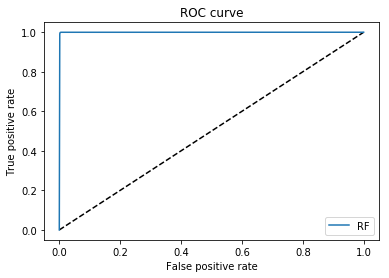

In [524]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**RF balanced classes**

In [526]:
balanced_y_pred_rf = balanced_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, balanced_y_pred_rf)

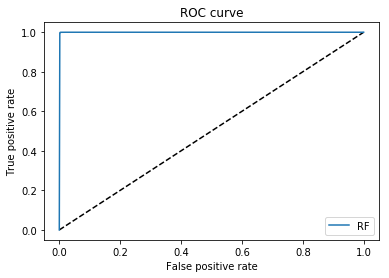

In [527]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**RF unbalanced classes**

In [528]:
un_b_y_pred_rf = clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, un_b_y_pred_rf)

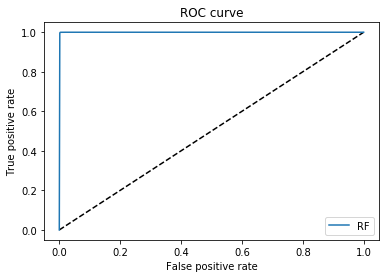

In [529]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**We can see that three types of RFs all perform well.**

### KNN

In [531]:
from sklearn.neighbors import KNeighborsClassifier

# neigh = KNeighborsClassifier(algorithm='ball_tree')
neigh = KNeighborsClassifier(algorithm='auto')
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [532]:
y_pred = neigh.predict(X_test)

[[ 17866  30047]
 [  1813 505322]]
True Negatives (TN):  17866
False Positives (FP):  30047
False Negatives (FN):  1813
True Positives (TP):  505322
accuracy:  0.9425995589570632
precision:  0.9438760929377682
recall:  0.9964250150354442
f1-score:  0.9694389661814248
              precision    recall  f1-score   support

           0       0.91      0.37      0.53     47913
           1       0.94      1.00      0.97    507135

   micro avg       0.94      0.94      0.94    555048
   macro avg       0.93      0.68      0.75    555048
weighted avg       0.94      0.94      0.93    555048



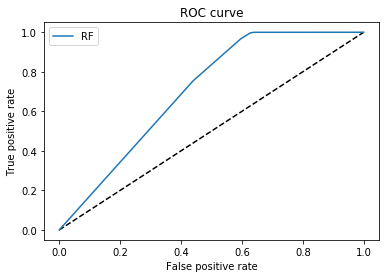

In [533]:
# confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
TP = c_matrix[1][1]
print(c_matrix)
print('True Negatives (TN): ', c_matrix[0][0])
print('False Positives (FP): ', c_matrix[0][1])
print('False Negatives (FN): ', c_matrix[1][0])
print('True Positives (TP): ', c_matrix[1][1])
print('accuracy: ', accuracy_score(y_test, y_pred))
precision = TP/(TP+FP)
print('precision: ', precision)
recall = TP/(TP+FN)
print('recall: ', recall)
print('f1-score: ', 2*precision*recall/(precision+recall))
print(classification_report(y_test, y_pred))

# ROC
y_pred_rf = neigh.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**ball tree**

[[ 17866  30047]
 [  1813 505322]]
True Negatives (TN):  17866
False Positives (FP):  30047
False Negatives (FN):  1813
True Positives (TP):  505322
accuracy:  0.9425995589570632
precision:  0.9438760929377682
recall:  0.9964250150354442
f1-score:  0.9694389661814248
              precision    recall  f1-score   support

           0       0.91      0.37      0.53     47913
           1       0.94      1.00      0.97    507135

   micro avg       0.94      0.94      0.94    555048
   macro avg       0.93      0.68      0.75    555048
weighted avg       0.94      0.94      0.93    555048



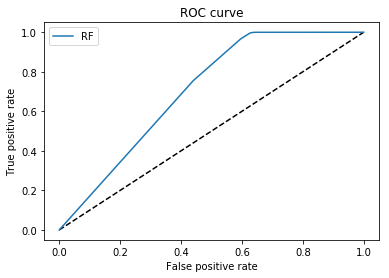

In [534]:
neigh = KNeighborsClassifier(algorithm='ball_tree')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
# confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
TP = c_matrix[1][1]
print(c_matrix)
print('True Negatives (TN): ', c_matrix[0][0])
print('False Positives (FP): ', c_matrix[0][1])
print('False Negatives (FN): ', c_matrix[1][0])
print('True Positives (TP): ', c_matrix[1][1])
print('accuracy: ', accuracy_score(y_test, y_pred))
precision = TP/(TP+FP)
print('precision: ', precision)
recall = TP/(TP+FN)
print('recall: ', recall)
print('f1-score: ', 2*precision*recall/(precision+recall))
print(classification_report(y_test, y_pred))

# ROC
y_pred_rf = neigh.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


**loops n_neighbors, weights, leaf_size and p seperately as the variable and try to find the optimal**

In [541]:
# n_neighbors 
import math
from datetime import datetime

k_size = int(math.sqrt(X_train.shape[0]))
performance_dict = dict() #dict[n_neigh] = [confusion_matrix, y_pred_rf]
started_at = datetime.now()

for n_neigh in range(k_size-50, k_size+50, 10):
    cur_performance = []
    print('current n neigh: ', n_neigh)
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    # confusion matrix
    c_matrix = confusion_matrix(y_test, y_pred)
    # ROC prob
    y_pred_rf = neigh.predict_proba(X_test)[:, 1]
    
    cur_performance.append(c_matrix)
    cur_performance.append(y_pred_rf)
    performance_dict[n_neigh] = cur_performance
    print(f"Running time: {((datetime.now() - started_at).seconds)} seconds\n")


current n neigh:  1011
Running time: 7914 seconds

current n neigh:  1021


KeyboardInterrupt: 

In [535]:
perf

(1126913, 9)

### Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegressionCV

clf_lr = LogisticRegressionCV(cv=10, random_state=0, multi_class='auto').fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


0.8675893690240892


array([[518841,      0],
       [ 79185,      0]])

### K fold Cross Validation

Split the original dataset into train 0.8 and test 0.2  
Then, train dataset is used for k fold

In [226]:
X_train, X_test, y_train, y_test = train_test_split(result.iloc[:, :-1], result.iloc[:, -1], test_size=0.2, random_state=42)



In [233]:
# code reference:
# https://www.kaggle.com/ynouri/random-forest-k-fold-cross-validation

from sklearn import metrics
import matplotlib.pyplot as plt

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X_train.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_train.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score


fold 0 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 1 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 2 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 3 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 4 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 5 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 6 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 7 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 8 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres
fold 9 in process
fitting...
computing train roc auc...
computing test roc auc...
appending socres


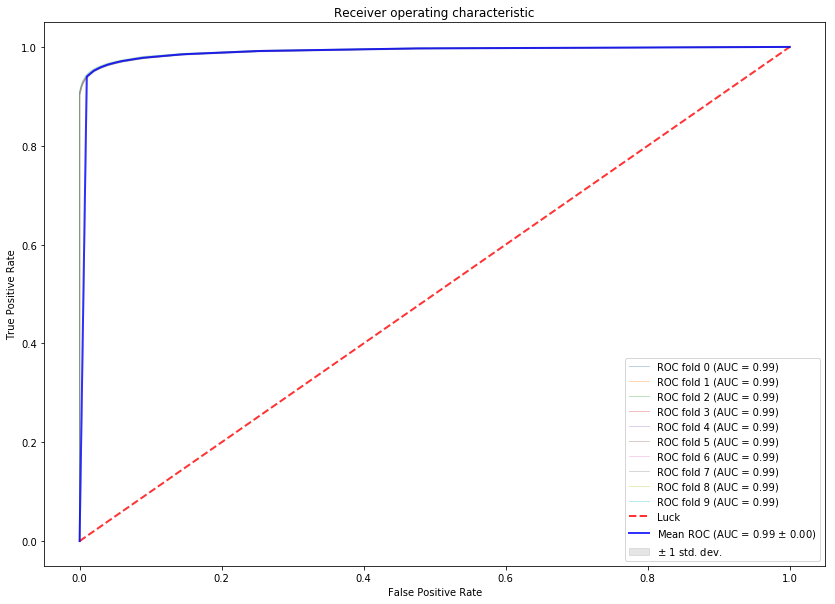

AUC Train  AUC Test
0        1.0  0.991634
1        1.0  0.991826
2        1.0  0.993129
3        1.0  0.992555
4        1.0  0.992065
5        1.0  0.992091
6        1.0  0.992018
7        1.0  0.991673
8        1.0  0.992071
9        1.0  0.992803

In [234]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')

results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X_train, y_train), range(10)):
    print(f'fold {i} in process')
    print('fitting...')
    clf.fit(X_train.iloc[train], y_train.iloc[train])
    print('computing train roc auc...')
    _, _, auc_score_train = compute_roc_auc(train)
    print('computing test roc auc...')
    fpr, tpr, auc_score = compute_roc_auc(test)
    print('appending socres')
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])


### Analyze random forest results

In [235]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


0.9875951881690762


array([[314178,     61],
       [  4435,  43766]])

In [236]:
clf.feature_importances_


array([0.0624846 , 0.04060229, 0.05029301, 0.06310145, 0.17272782,
       0.41094833, 0.19984252])

In [237]:
X_test.columns


Index(['difficulty', 'gasLimit', 'gasUsed', 'miner', 'number', 'size',
       'timestamp'],
      dtype='object')

In [238]:
import sklearn.feature_selection


In [239]:
sklearn.feature_selection.chi2(X_train, y_train)


(array([1.12022622e+17, 2.15258409e+09, 8.83380544e+08, 7.53259563e+05,
        9.34132218e+09, 5.54222873e+09, 1.01753650e+10]),
 array([0., 0., 0., 0., 0., 0., 0.]))

In [240]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [241]:
kbest_model = SelectKBest(chi2, 'all').fit(X_train, y_train)


In [242]:
kbest_model.scores_


array([1.12022622e+17, 2.15258409e+09, 8.83380544e+08, 7.53259563e+05,
       9.34132218e+09, 5.54222873e+09, 1.01753650e+10])

### Logistic Regression with Cross Validation

In [274]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0, class_weight='balanced').fit(X_train, y_train)

In [275]:
y_pred = clf.predict(X_test)

In [276]:
accuracy_score(y_test, y_pred)

0.8670097119523231

In [277]:
clf.coef_

array([[-7.70124039e-18, -1.40602682e-25, -6.80580477e-26,
        -2.49135962e-29, -3.43788189e-25,  1.77432499e-26,
         4.53132585e-24]])

## Step 4: Analyze Features

### size

In [246]:
canonical_df['size'].describe()


count    1.572046e+06
mean     2.125502e+04
std      1.169464e+04
min      5.180000e+02
25%      1.273600e+04
50%      2.236700e+04
75%      2.981100e+04
max      5.355760e+05
Name: size, dtype: float64

In [245]:
uncle_df['size'].describe()


count    81202.000000
mean       539.661782
std          6.076964
min        518.000000
25%        538.000000
50%        541.000000
75%        545.000000
max        553.000000
Name: size, dtype: float64

In [247]:
forked_df['size'].describe()

count     94483.000000
mean      19430.001069
std       12794.332241
min         517.000000
25%        8729.000000
50%       20817.000000
75%       29016.000000
max      426087.000000
Name: size, dtype: float64

In [248]:
broadcast_df['size'].describe()

count    6.446700e+04
mean     1.580268e+05
std      1.274961e+05
min      1.054000e+03
25%      5.890000e+04
50%      1.565490e+05
75%      2.429330e+05
max      4.042178e+06
Name: size, dtype: float64

### miner

We group miners and count their canonical blocks,   
and then, show their performance, which is performance = canonical number / (canonical number + non canonical number)

In [252]:
# dict['miner_addr'] = counter
non_canonical_miner_dict = dict()  
canonical_miner_dict = dict()

# count non canonical blocks for miners
for miner_addr in uncle_df.miner:
    if miner_addr in non_canonical_miner_dict:
        non_canonical_miner_dict[miner_addr] += 1
    else:
        non_canonical_miner_dict[miner_addr] = 1

for miner_addr in forked_df.miner:
    if miner_addr in non_canonical_miner_dict:
        non_canonical_miner_dict[miner_addr] += 1
    else:
        non_canonical_miner_dict[miner_addr] = 1
        
for miner_addr in broadcast_df.miner:
    if miner_addr in non_canonical_miner_dict:
        non_canonical_miner_dict[miner_addr] += 1
    else:
        non_canonical_miner_dict[miner_addr] = 1
        
# count canonical blocks for miners
for miner_addr in canonical_df.miner:
    if miner_addr in canonical_miner_dict:
        canonical_miner_dict[miner_addr] += 1
    else:
        canonical_miner_dict[miner_addr] = 1

List the miners who create most non canonical blocks

In [253]:
sorted(non_canonical_miner_dict.items(), key=lambda kv: kv[1], reverse=True)

[('0xea674fdde714fd979de3edf0f56aa9716b898ec8', 36975),
 ('0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c', 30266),
 ('0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', 23591),
 ('0x829bd824b016326a401d083b33d092293333a830', 20553),
 ('0xb2930b35844a230f00e51431acae96fe543a0347', 14002),
 ('', 11295),
 ('0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c', 9802),
 ('0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8', 9492),
 ('0x52bc44d5378309EE2abF1539BF71dE1b7d7bE3b5', 7697),
 ('0x2a65aca4d5fc5b5c859090a6c34d164135398226', 6672),
 ('0x829BD824B016326A401d083B33D092293333A830', 5764),
 ('0xb2930B35844a230f00E51431aCAe96Fe543a0347', 4142),
 ('0x1b5b5906306c96b842dc03105e3b38636a4eda0b', 2869),
 ('0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01', 2228),
 ('0x2a5994b501e6a560e727b6c2de5d856396aadd38', 2041),
 ('0x61c808d82a3ac53231750dadc13c777b59310bd9', 1995),
 ('0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb', 1699),
 ('0x84a0d77c693adabe0ebc48f88b3ffff010577051', 1545),
 ('0x04668Ec2f57cC15c381b461B9fEDaB5D451c8F7F'

List the miners who create most canonical blocks

In [251]:
sorted(canonical_miner_dict.items(), key=lambda kv: kv[1], reverse=True)

[('0xea674fdde714fd979de3edf0f56aa9716b898ec8', 417480),
 ('0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c', 353943),
 ('0x829bd824b016326a401d083b33d092293333a830', 190661),
 ('0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', 190257),
 ('0xb2930b35844a230f00e51431acae96fe543a0347', 88772),
 ('0x2a65aca4d5fc5b5c859090a6c34d164135398226', 27046),
 ('0x2a5994b501e6a560e727b6c2de5d856396aadd38', 22593),
 ('0x35f61dfb08ada13eba64bf156b80df3d5b3a738d', 20852),
 ('0x04668ec2f57cc15c381b461b9fedab5d451c8f7f', 20750),
 ('0x005e288d713a5fb3d7c9cf1b43810a98688c7223', 19225),
 ('0xd224ca0c819e8e97ba0136b3b95ceff503b79f53', 18427),
 ('0x09ab1303d3ccaf5f018cd511146b07a240c70294', 17333),
 ('0xaa5c4244f05c92781c4f259913319d8ba1acf05e', 13154),
 ('0x52e44f279f4203dcf680395379e5f9990a69f13c', 12214),
 ('0x4c549990a7ef3fea8784406c1eecc98bf4211fa5', 12049),
 ('0x06b8c5883ec71bc3f4b332081519f23834c8706e', 10796),
 ('0x9d6d492bd500da5b33cf95a5d610a73360fcaaa0', 10488),
 ('0x00192fb10df37c9fb26829eb2cc623cd1bf599e

Collect miners appearing in both canonical and non canonical datasets  
Calculate the miners performance

In [261]:
# performance = canonical / (canonical + non canonical)
# we have canonical and non canonical (uncle, forked and broadcast),
# miner_performance_dict = dict()  # dict[miner_addr] = performance
# for miner_addr, c_block_number in canonical_miner_dict.iter:

miner_performance_dict = dict()

for cur_miner, canonical_number in canonical_miner_dict.items():
    if cur_miner in non_canonical_miner_dict:
        miner_performance_dict[cur_miner] = canonical_number / (canonical_number + non_canonical_miner_dict[cur_miner])
#    else:
 #       miner_performance_dict[cur_miner] = 


List miners performance 

In [263]:
sorted(miner_performance_dict.items(), key=lambda kv: kv[1], reverse=True)      


[('0x9541b5a7beb445641990e8cf67ce8ad467ec930b', 0.9964664310954063),
 ('0x09e76074fa4e2d100d14d54c45a5558567d80c28', 0.987012987012987),
 ('0xf616d8d43635098d7a145d8bc5418d95d6a3d8c0', 0.9869791666666666),
 ('0x0f06d283513504c261ff789f33df1d93e9a5225c', 0.9833679833679834),
 ('0x7c6694032b4db11ac485e1cff0f7509d58b41569', 0.9800590841949779),
 ('0x8bf932fb121c3c278d62ad4d36fad2fc03a14bce', 0.9785932721712538),
 ('0xff1b891969773159366ab6310ff63a69ac4acffd', 0.9762675296655879),
 ('0xee2564013e07792478a289c7d2e2791a2d73fe3d', 0.9761904761904762),
 ('0xb3e2d691a9aa6a7895891243c63646326adb2a8e', 0.9714285714285714),
 ('0x2575188aa6fab4d7dd948544039b4231cf20badd', 0.967741935483871),
 ('0xb2d0cba76ed764c068d25bc9b620365fd5bf4a35', 0.9666666666666667),
 ('0x11a73b18557944fbde9f41c0c436069f870bd2eb', 0.9661016949152542),
 ('0xf3a71cc1be5ce833c471e3f25aa391f9cd56e1aa', 0.9615384615384616),
 ('0x1a496ef4a87299c3fa2da155f581242a1d0d40de', 0.9611650485436893),
 ('0x4b38a1f9c1a580fe29f150d738eac85

Set the performance bar  
Collect miners whose performance is higher than the bar

In [264]:
performance_boundary = 0.5
good_miner = dict()

for cur_miner, cur_performance in miner_performance_dict.items():
    if cur_performance >= performance_boundary:
        good_miner[cur_miner] = cur_performance     

List good miners with canoncial number and performance

In [266]:
for miner in canonical_miner_dict:
    if miner in good_miner:
        print(miner, ' ', canonical_miner_dict[miner], ' ', good_miner[miner])

0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c   353943   0.9212251665109354
0x2a5994b501e6a560e727b6c2de5d856396aadd38   22593   0.917147032556629
0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5   190257   0.8896833264748794
0x2a65aca4d5fc5b5c859090a6c34d164135398226   27046   0.8021234948692093
0x829bd824b016326a401d083b33d092293333a830   190661   0.9026911094908482
0xea674fdde714fd979de3edf0f56aa9716b898ec8   417480   0.9186388091230154
0x35f61dfb08ada13eba64bf156b80df3d5b3a738d   20852   0.9408473582096286
0x70aec4b9cffa7b55c0711b82dd719049d615e21d   2513   0.8615015426808365
0xb2930b35844a230f00e51431acae96fe543a0347   88772   0.8637593165586627
0x3e8702685ed7826a55acb1c6eb4a6d74638d165c   96   0.9411764705882353
0x52e44f279f4203dcf680395379e5f9990a69f13c   12214   0.9175869581549094
0x09ab1303d3ccaf5f018cd511146b07a240c70294   17333   0.9206458809157062
0xff1b891969773159366ab6310ff63a69ac4acffd   1810   0.9762675296655879
0x06b8c5883ec71bc3f4b332081519f23834c8706e   10796   0.92100324176

For miners not appearing in good miner, we find their canonical blocks numbers are pretty small. So we can ignore them.

In [267]:
for miner in canonical_miner_dict:
    if miner not in good_miner:
        print(canonical_miner_dict[miner])

28
1
38
34
1
1
1
3
17
16
11
1
2
22
7
1
1
1
1
1
1
1
26
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
5
1
1
1
1
1
1
1
1
1
6
1
1
16
11
1
1
1
1
1
1
1
1
1
1
11
5
4
1
1
1
1
1
1
1
1
1
3
9
1
1
6
1
1
1
1
1
1
1
1
1
1
1
7
1
1
1
1
1
1
1
1
1
1
57
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
2
1
3
17
1
1
1
1
1
1
1
1
1
1
25
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
1
1
25
1
1
1
1
1
1
1
1
1
1
20
1
11
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
45
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
14
9
59
1
2
37
1
1
1
19
19
23
1
37
22
1
3
1
1
1
3
1
1


### Analyze relationship between factors and the corresponding value 

In [278]:
from scipy import stats

In [279]:
stats.pearsonr(result.timestamp.to_numpy(), result.label.to_numpy())

(-0.30414423503104915, 0.0)

In [287]:
stats.pearsonr(result.gasLimit.to_numpy(), result.label.to_numpy())

(-0.2623883112084949, 0.0)

In [288]:
stats.pearsonr(result.gasUsed.to_numpy(), result.label.to_numpy())

(-0.02557144910533309, 9.173872111352913e-260)

In [291]:
stats.pearsonr(result.miner.to_numpy(), result.label.to_numpy())

(-0.06438982829823495, 0.0)

In [292]:
result.columns

Index(['difficulty', 'gasLimit', 'gasUsed', 'miner', 'number', 'size',
       'timestamp', 'label'],
      dtype='object')